# Business Understanding

## Introduction 

The Credit Solvency Prediction Dataset represents an essential tool for exploring the complex dynamics that influence a person's ability to manage their finances and meet their credit obligations. Credit solvency, a crucial aspect in the modern financial world, requires a deep understanding of multiple factors that can influence the probability of loan default.

This dataset collects a variety of relevant attributes, including the person's age (person_age), their annual income (person_income), the type of home ownership (person_home_ownership), the length of employment in years (person_emp_length), the purpose of the loan (loan_intent), the loan grade (loan_grade), the loan amount (loan_amnt), the loan interest rate (loan_int_rate), the loan status (loan_status, where 0 is no default and 1 is default), the percentage of income dedicated to the loan (loan_percent_income), the history of defaults (cb_person_default_on_file), and the length of the credit history (cb_person_cred_hist_length).

By applying advanced analytical techniques and machine learning to this dataset, researchers and professionals in the financial sector can develop strategies to better assess credit risk. This not only allows for more effective risk management by financial institutions but also the possibility of offering fairer and more tailored conditions to borrowers, based on their actual risk profile. Thus, this dataset becomes a fundamental pillar for improving our understanding of credit behavior and for creating a more inclusive and equitable financial environment.

## Objective

- Find the best ML model to help me predict loan status.

# Data Understanding

###### Libraries

In [1]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import figure

# Statistics
import scipy.stats as ss
from scipy.stats import chi2_contingency

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Model Selection and Evaluation
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score,
    accuracy_score,
    recall_score
)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
#sns.set_theme(style="white", palette=None)
#sns.set_style("whitegrid")

## Data Collection

In [3]:
data = pd.read_csv('dataset\credit_risk_dataset.csv')

## Exploratory data analysis

### Univariate Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
data.describe(include='all')

person_age  person_income person_home_ownership  person_emp_length  \
count   32581.000000   3.258100e+04                 32581       31686.000000   
unique           NaN            NaN                     4                NaN   
top              NaN            NaN                  RENT                NaN   
freq             NaN            NaN                 16446                NaN   
mean       27.734600   6.607485e+04                   NaN           4.789686   
std         6.348078   6.198312e+04                   NaN           4.142630   
min        20.000000   4.000000e+03                   NaN           0.000000   
25%        23.000000   3.850000e+04                   NaN           2.000000   
50%        26.000000   5.500000e+04                   NaN           4.000000   
75%        30.000000   7.920000e+04                   NaN           7.000000   
max       144.000000   6.000000e+06                   NaN         123.000000   

       loan_intent loan_grade     loan_amnt  loan_int_rate   loan_status  \
count        32581      32581  32581.000000   29465.000000  32581.000000   
unique           6          7           NaN            NaN           NaN   
top      EDUCATION          A           NaN            NaN           NaN   
freq          6453      10777           NaN            NaN           NaN   
mean           NaN        NaN   9589.371106      11.011695      0.218164   
std            NaN        NaN   6322.086646       3.240459      0.413006   
min            NaN        NaN    500.000000       5.420000      0.000000   
25%            NaN        NaN   5000.000000       7.900000      0.000000   
50%            NaN        NaN   8000.000000      10.990000      0.000000   
75%            NaN        NaN  12200.000000      13.470000      0.000000   
max            NaN        NaN  35000.000000      23.220000      1.000000   

        loan_percent_income cb_person_default_on_file  \
count          32581.000000                     32581   
unique                  NaN                         2   
top                     NaN                         N   
freq                    NaN                     26836   
mean               0.170203                       NaN   
std                0.106782                       NaN   
min                0.000000                       NaN   
25%                0.090000                       NaN   
50%                0.150000                       NaN   
75%                0.230000                       NaN   
max                0.830000                       NaN   

        cb_person_cred_hist_length  
count                 32581.000000  
unique                         NaN  
top                            NaN  
freq                           NaN  
mean                      5.804211  
std                       4.055001  
min                       2.000000  
25%                       3.000000  
50%                       4.000000  
75%                       8.000000  
max                      30.000000

#### Missing Values

In [6]:
cantidad_datos_vacios = data.isnull().sum()
print("Cantidad de datos vacíos por columna:")
print(cantidad_datos_vacios)

Cantidad de datos vacíos por columna:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [7]:
cantidad_datos_vacios = data.isnull().sum()
print("Porcentaje de datos vacíos por columna:")
print(data.isnull().sum()*100/len(data))

Porcentaje de datos vacíos por columna:
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [8]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

loan_int_rate                 9.563856
person_emp_length             2.747000
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [10]:
cantidad_datos_vacios = data.isnull().sum()
print("Cantidad de datos vacíos por columna:")
print(cantidad_datos_vacios)

Cantidad de datos vacíos por columna:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


<Axes: >

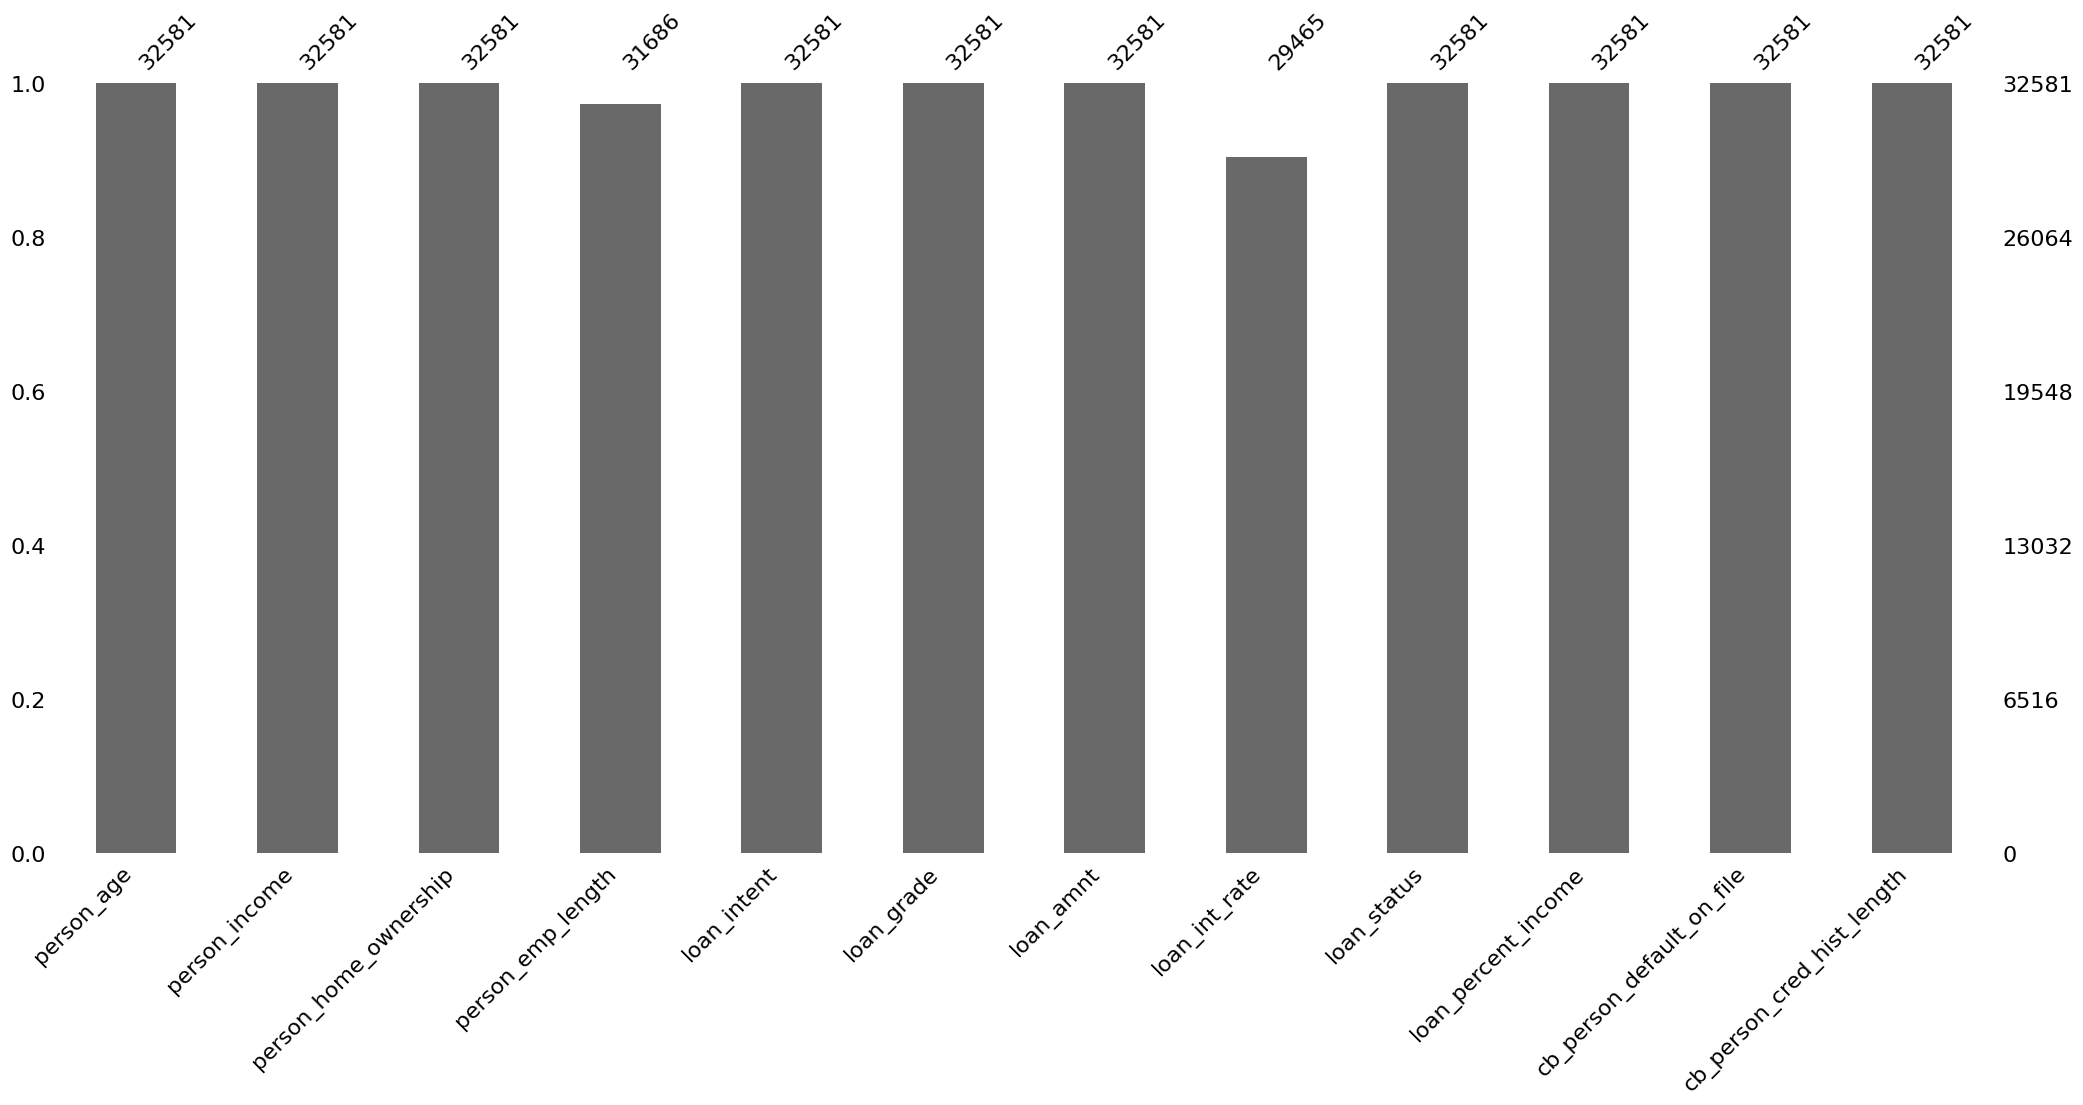

In [11]:
msno.bar(data)

<Axes: >

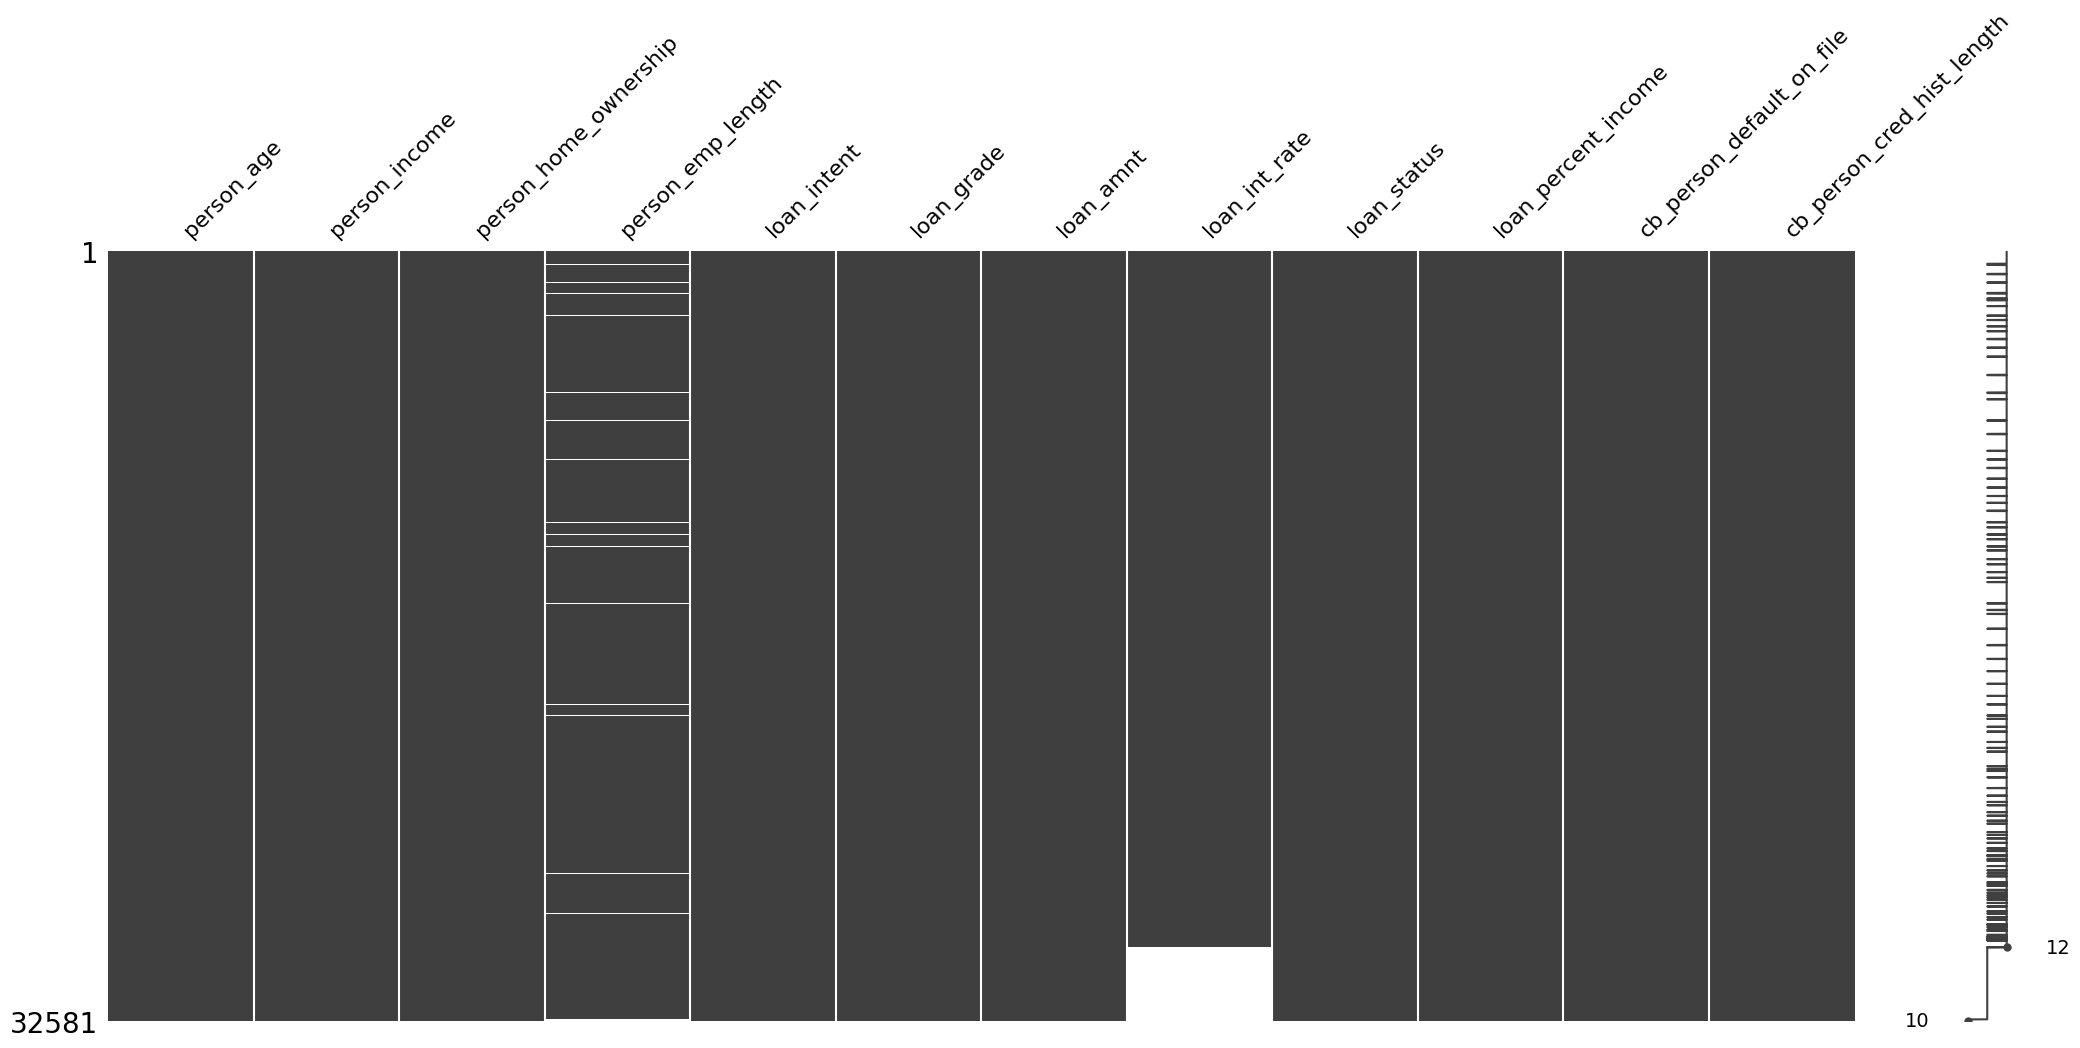

In [12]:
msno.matrix(data.sort_values(["loan_int_rate","person_emp_length"]))

<Axes: >

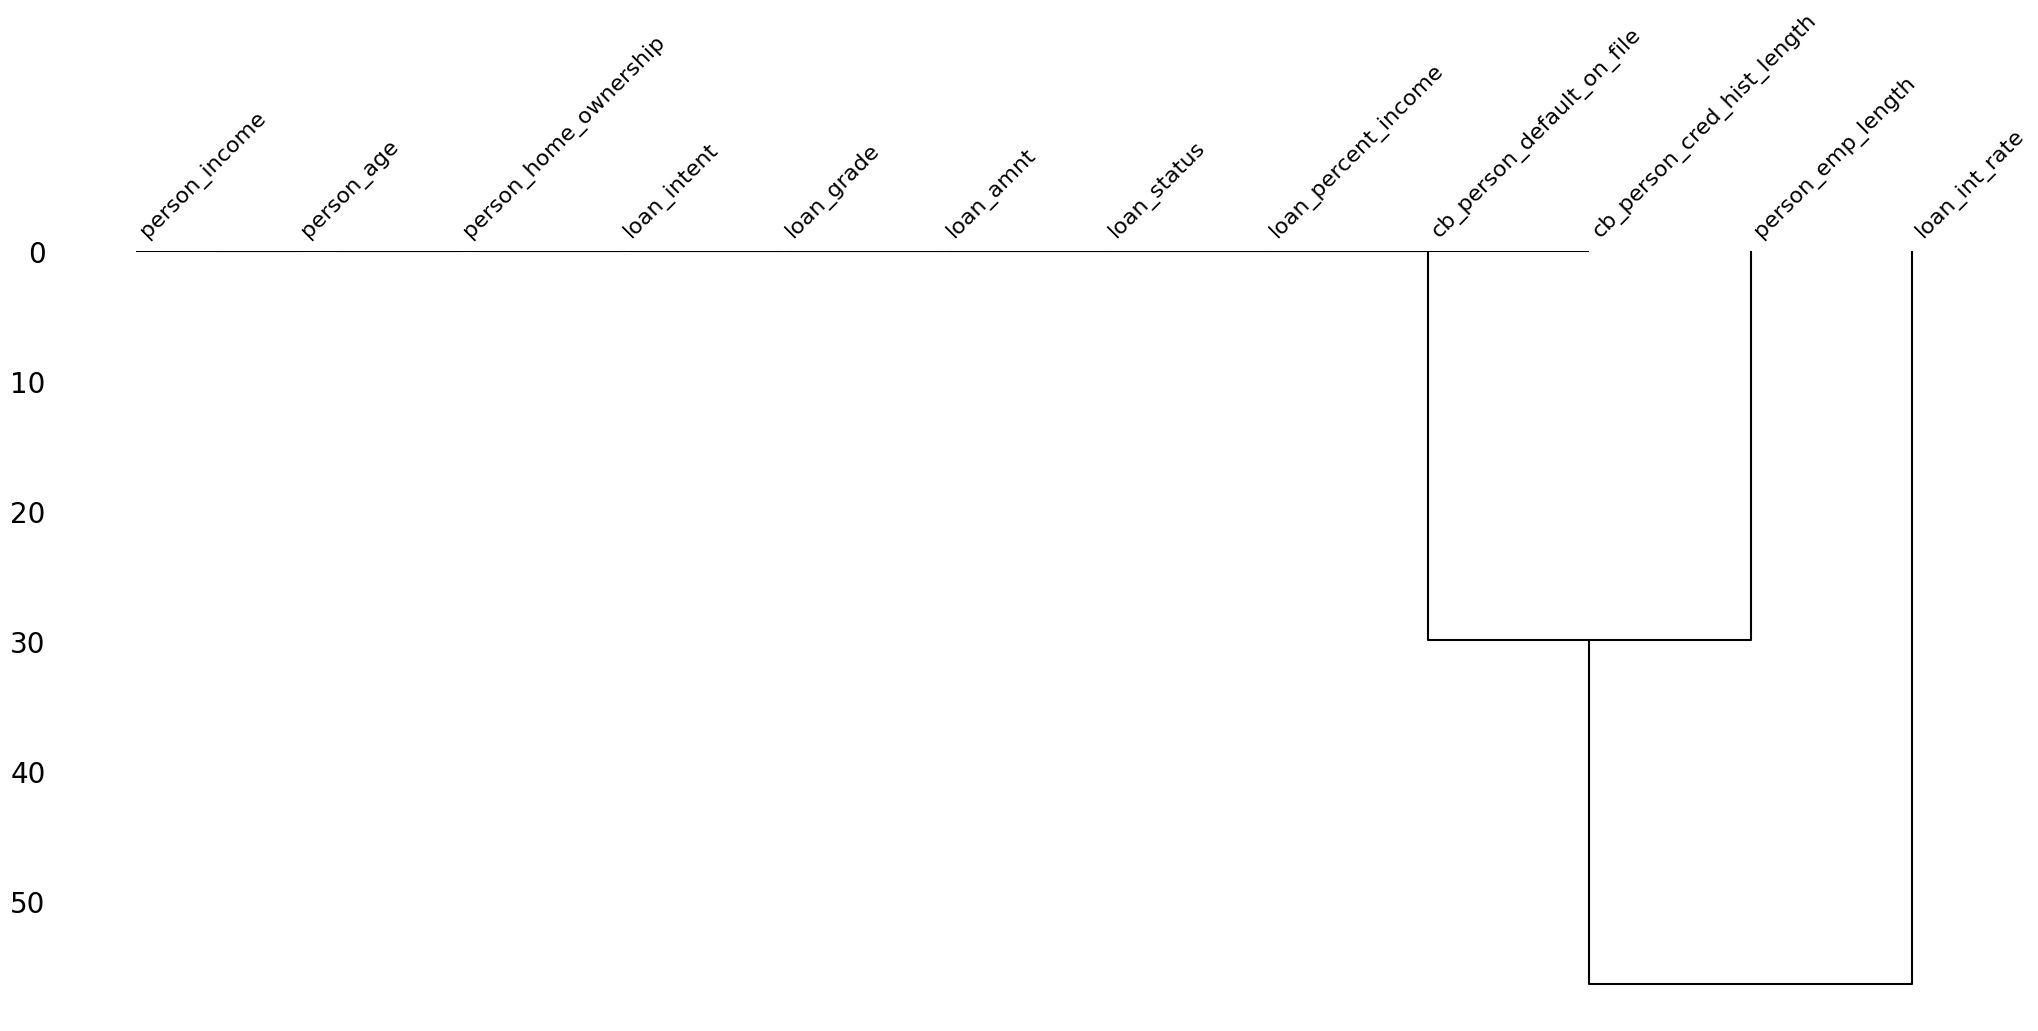

In [13]:
msno.dendrogram(data)

In [14]:
gg = {k.name: v for k, v in data.columns.to_series().groupby(data.dtypes).groups.items()}
for i in gg["object"]:
    print("-> Column : "+i)
    print(data[i].unique())

-> Column : person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
-> Column : loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
-> Column : loan_grade
['D' 'B' 'C' 'A' 'E' 'F' 'G']
-> Column : cb_person_default_on_file
['Y' 'N']


#### Conclusions

###### **Annual Income (person_income)**:
- Range: \\$4,000 to \\$6,000,000 USD.
- Average income: Around \\$66,074 USD
- High variability in income, indicating a diverse applicant base.

###### **Age (person_age)**:
- Range: 20 to 144 years.
- Average age: Approximately 27.7 years.
- The distribution suggests that most applicants are young adults.

###### **Loan Amount (loan_amnt)**:
- Range: \\$500 to \\$35,000 USD.
- Average loan amount: Approximately \\$9,589 USD.

###### **Interest Rate (loan_int_rate)**:
- Range: 5.42% to 23.22%.
- Average interest rate: Around 11%.

###### **Employment Length (person_emp_length)**:
- Range: 0 to 123 years.
- Average employment length: About 4.8 years.
- Some values seem unrealistically high, which could indicate data errors or outliers.

###### **Default History (cb_person_default_on_file)**:
- Most applicants (approximately 82.4%) do not have a default history.

###### **Home Ownership (person_home_ownership)**:
- Categories include Rent, Own, Mortgage, and Other.
- Most applicants (approximately 50.5%) live in rented accommodations.

###### **Loan Intent (loan_intent)**:
- Six distinct categories, with "Education" being the most common.

###### **Loan Grade (loan_grade)**:
- Seven categories, from A to G, with A being the most common.

###### **Loan Status (loan_status)**:
- Binary (0 or 1), where 0 is no default and 1 is default.
- Approximately 21.8% of loans are in default.

###### **Loan Percent Income (loan_percent_income)**:
- Range: 0% to 83%.
- On average, applicants dedicate around 17% of their income to loan repayment.

###### **Credit History Length (cb_person_cred_hist_length)**:
- Range: 2 to 30 years.
- Average credit history length: Approximately 5.8 years.

This univariate analysis provides an overview of the individual characteristics of loan applicants and their financial profiles. The diversity in attributes such as age, income, and credit history suggests a wide variety in the risk profiles of the applicants. The presence of extreme or outlier values in certain variables indicates the need for more detailed data cleaning and validation before proceeding with more complex analyses.

### Bivariate Analysis

#### Pair Plot

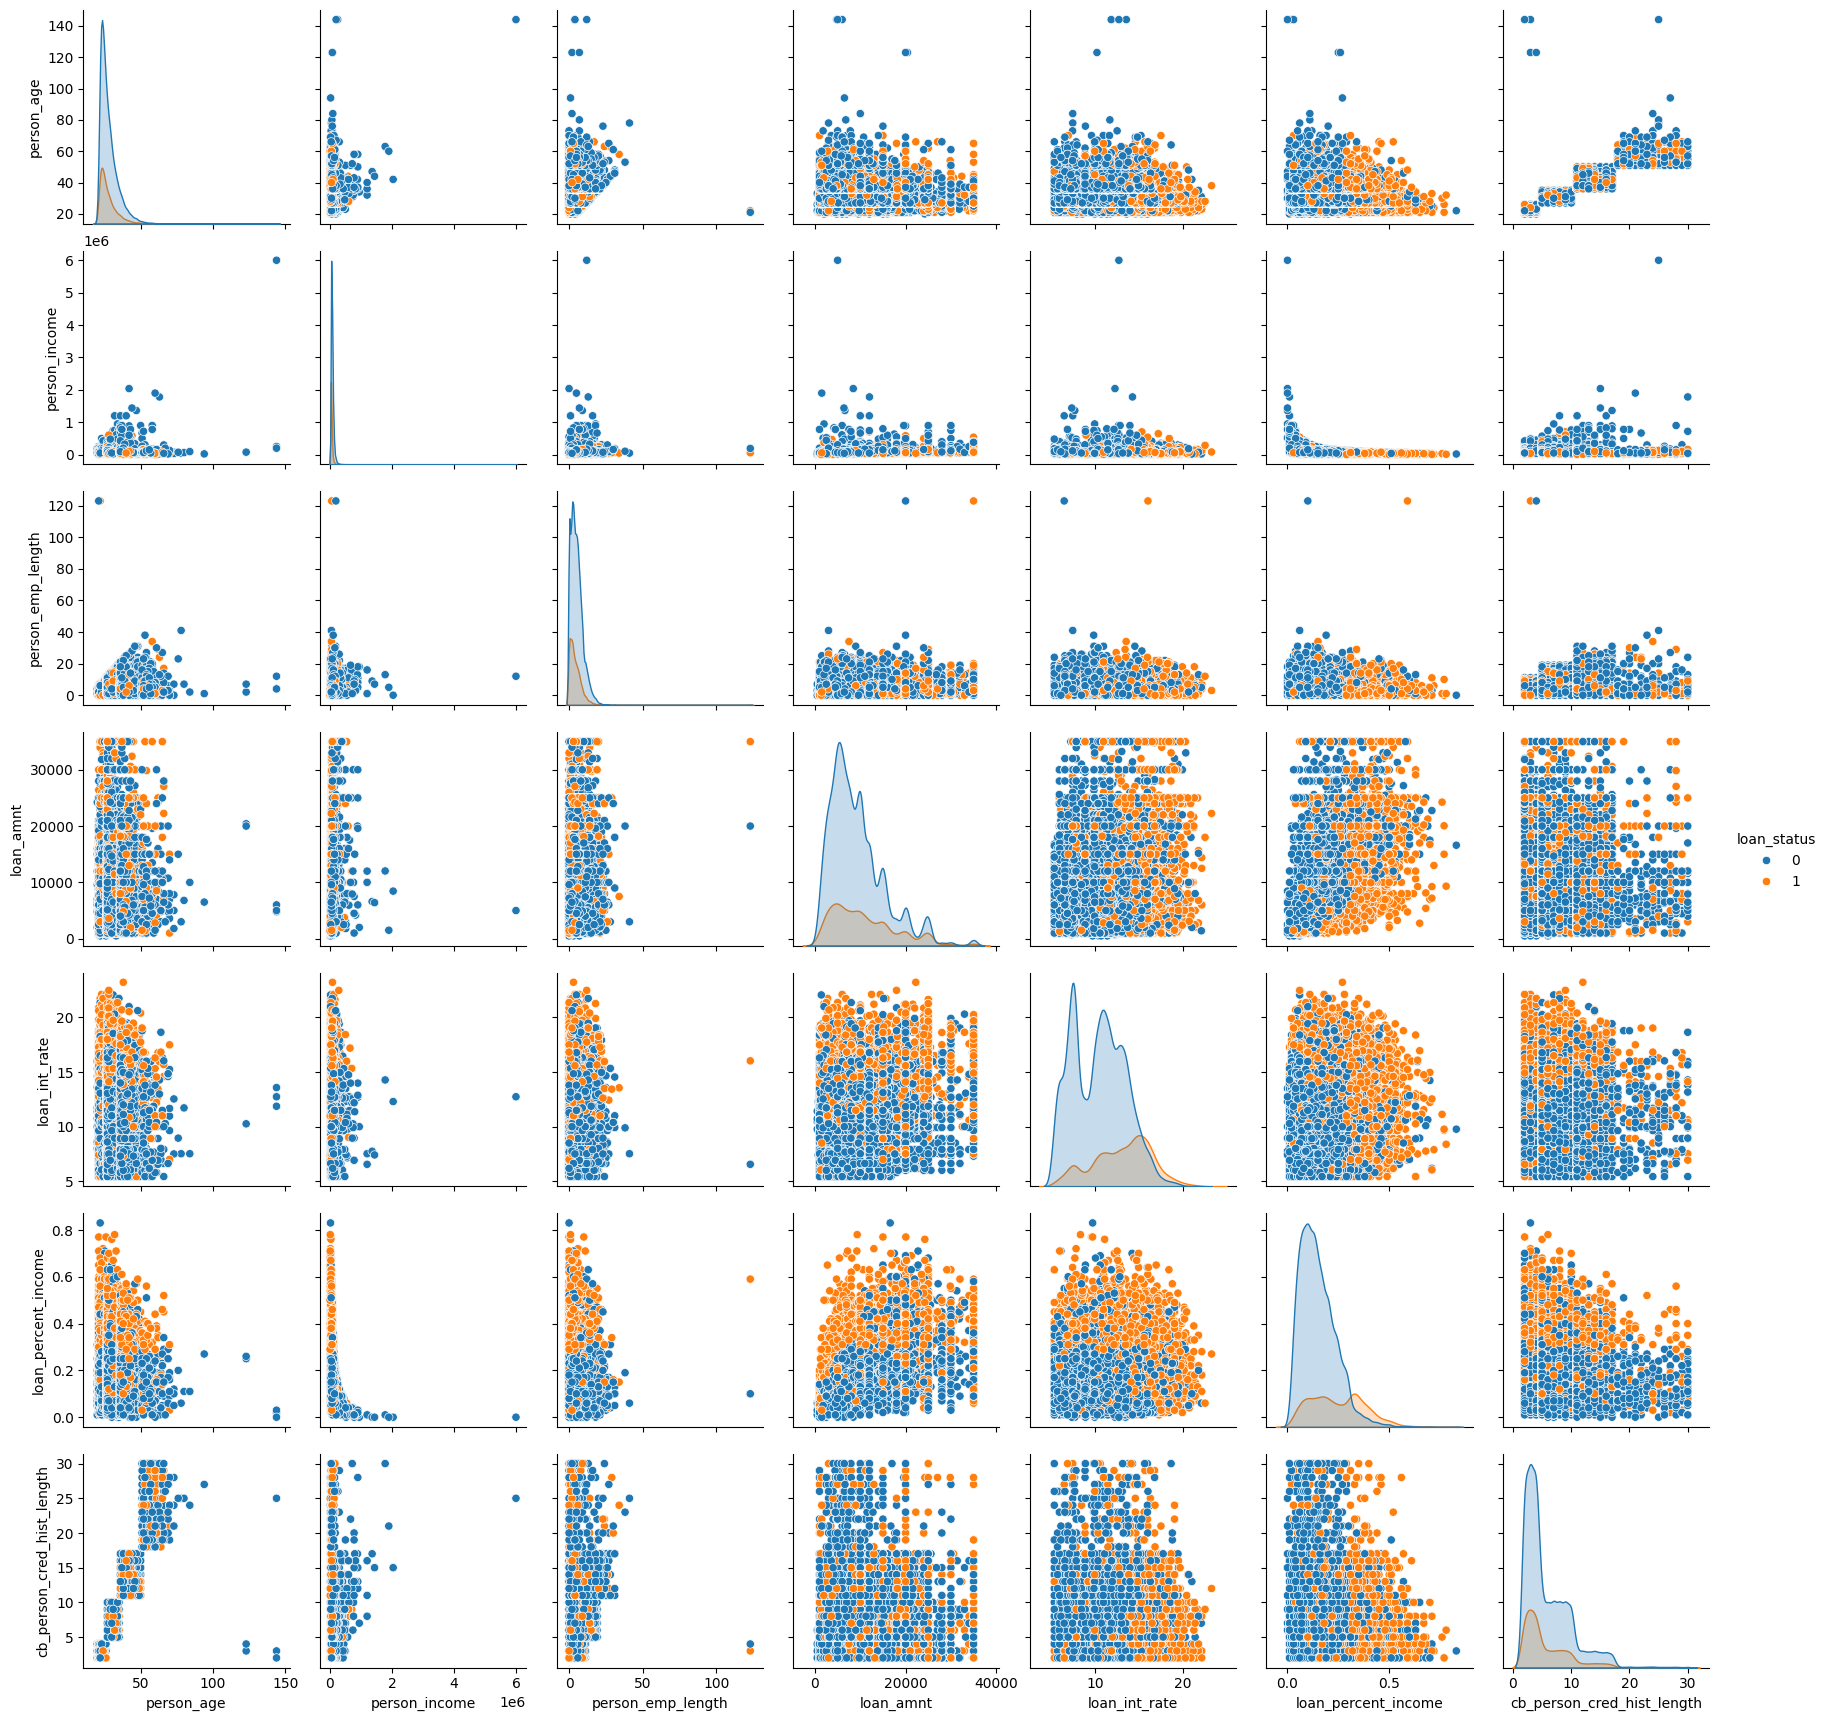

In [15]:
sns.pairplot(data=data, hue='loan_status')

#### Correlation Matrix

In [16]:
data.corr(numeric_only=True)

person_age  person_income  person_emp_length  \
person_age                    1.000000       0.173202           0.163106   
person_income                 0.173202       1.000000           0.134268   
person_emp_length             0.163106       0.134268           1.000000   
loan_amnt                     0.050787       0.266820           0.113082   
loan_int_rate                 0.012580       0.000792          -0.056405   
loan_status                  -0.021629      -0.144449          -0.082489   
loan_percent_income          -0.042411      -0.254471          -0.054111   
cb_person_cred_hist_length    0.859133       0.117987           0.144699   

                            loan_amnt  loan_int_rate  loan_status  \
person_age                   0.050787       0.012580    -0.021629   
person_income                0.266820       0.000792    -0.144449   
person_emp_length            0.113082      -0.056405    -0.082489   
loan_amnt                    1.000000       0.146813     0.105376   
loan_int_rate                0.146813       1.000000     0.335133   
loan_status                  0.105376       0.335133     1.000000   
loan_percent_income          0.572612       0.120314     0.379366   
cb_person_cred_hist_length   0.041967       0.016696    -0.015529   

                            loan_percent_income  cb_person_cred_hist_length  
person_age                            -0.042411                    0.859133  
person_income                         -0.254471                    0.117987  
person_emp_length                     -0.054111                    0.144699  
loan_amnt                              0.572612                    0.041967  
loan_int_rate                          0.120314                    0.016696  
loan_status                            0.379366                   -0.015529  
loan_percent_income                    1.000000                   -0.031690  
cb_person_cred_hist_length            -0.031690                    1.000000

<Axes: >

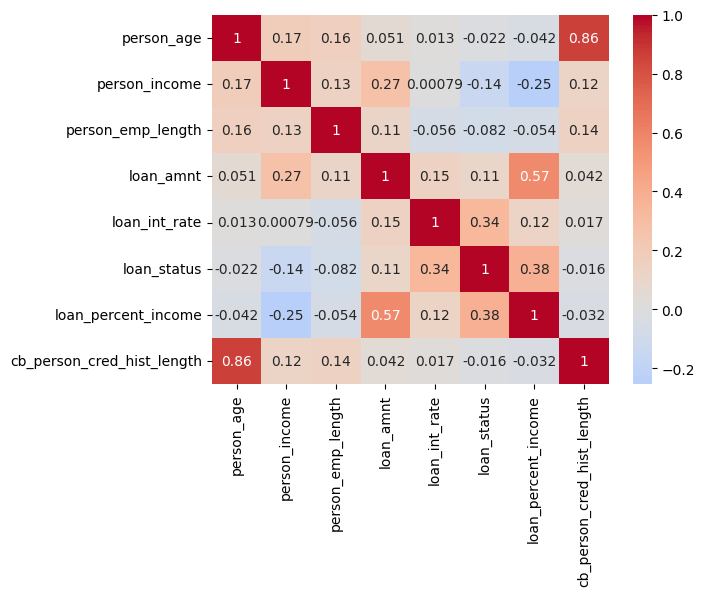

In [17]:
correlation_matrix = data.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

##### loan_status

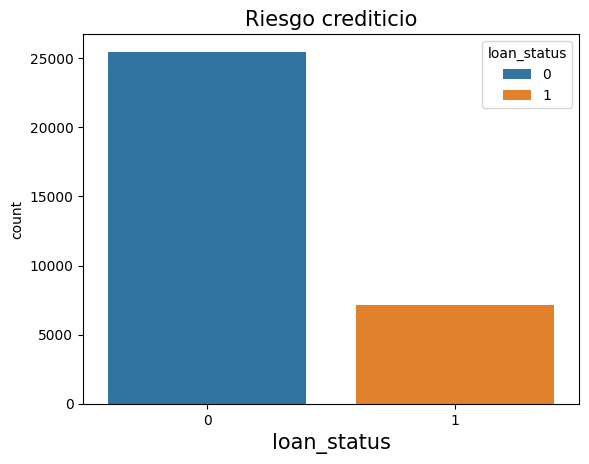

In [18]:
sns.countplot(data = data, x = 'loan_status', hue = 'loan_status')
plt.xlabel('loan_status', fontsize = 15)
plt.title('Riesgo crediticio', fontsize = 15)
plt.show()

###### person_age

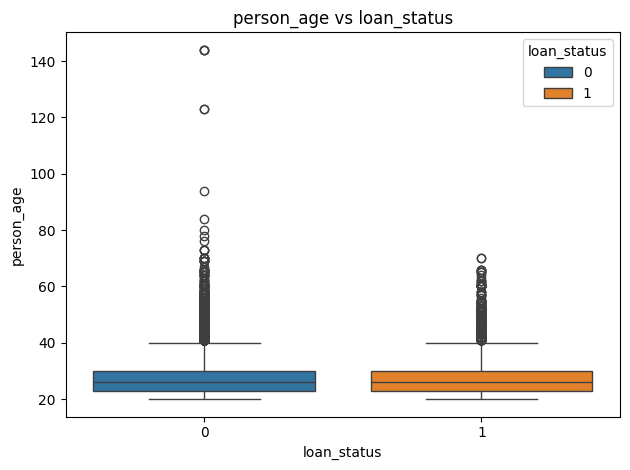

In [19]:
sns.boxplot(x='loan_status',hue='loan_status',y='person_age',data=data)
plt.title(f'person_age vs loan_status')
plt.tight_layout()
plt.show()

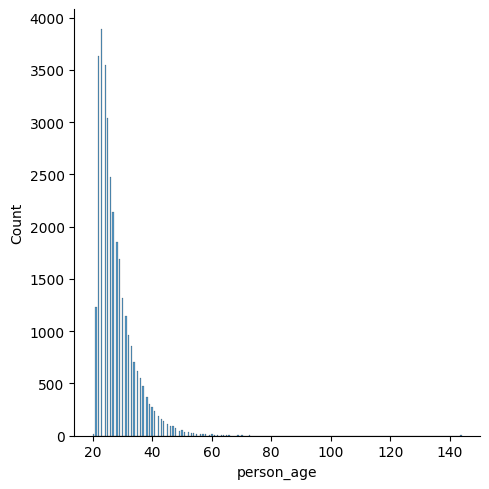

In [20]:
sns.displot(data, x="person_age")

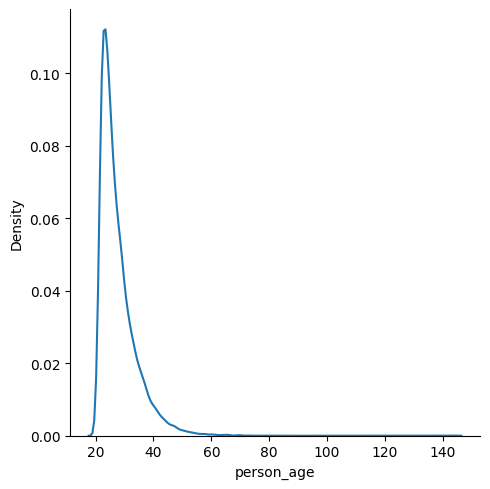

In [21]:
sns.displot(data, x="person_age", kind="kde")

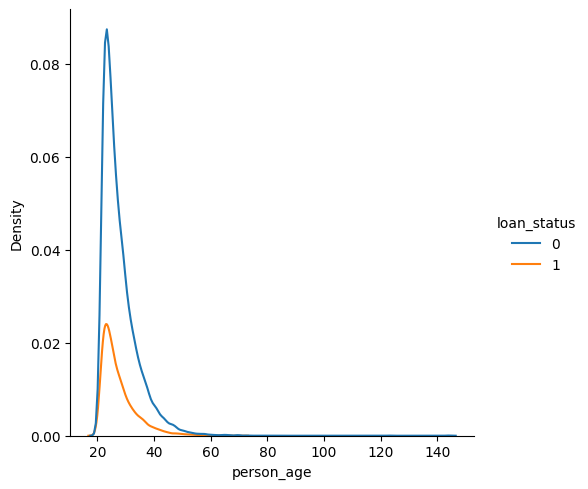

In [22]:
sns.displot(data, x="person_age", kind="kde", hue="loan_status")

In [23]:
data.groupby(["loan_status"]).agg({'person_age': ['min', 'max','median','mean','count']})

person_age                              
                   min  max median       mean  count
loan_status                                         
0                   20  144   26.0  27.807129  25473
1                   20   70   26.0  27.474676   7108

In [24]:
def sturges_formula(data):
    """
    Calculate the number of bins using Sturges' formula.
    
    Parameters:
        data (array-like): Input data for which the number of bins is calculated.
        
    Returns:
        int: Number of bins according to Sturges' formula.
    """
    N = len(data)
    k = 1 + np.log2(N)
    return int(np.ceil(k))


In [25]:
num_bins  = sturges_formula(data['person_age'])
data['person_age_bin'] = pd.cut(data['person_age'],num_bins)
data.groupby(["person_age_bin"]).agg({'person_age': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\3304542763.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["person_age_bin"]).agg({'person_age': ['min', 'max','median','mean','count'],'loan_status':['mean']})


person_age                                  loan_status
                       min    max median        mean  count        mean
person_age_bin                                                         
(19.876, 27.75]       20.0   27.0   24.0   23.975109  19967    0.225172
(27.75, 35.5]         28.0   35.0   30.0   30.675448   9148    0.206056
(35.5, 43.25]         36.0   43.0   38.0   38.610136   2565    0.206238
(43.25, 51.0]         44.0   51.0   46.0   46.619632    652    0.203988
(51.0, 58.75]         52.0   58.0   54.0   54.433962    159    0.257862
(58.75, 66.5]         59.0   66.0   62.0   62.406250     64    0.343750
(66.5, 74.25]         67.0   73.0   70.0   70.062500     16    0.125000
(74.25, 82.0]         76.0   80.0   78.0   78.000000      3    0.000000
(82.0, 89.75]         84.0   84.0   84.0   84.000000      1    0.000000
(89.75, 97.5]         94.0   94.0   94.0   94.000000      1    0.000000
(97.5, 105.25]         NaN    NaN    NaN         NaN      0         NaN
(105.25, 113.0]        NaN    NaN    NaN         NaN      0         NaN
(113.0, 120.75]        NaN    NaN    NaN         NaN      0         NaN
(120.75, 128.5]      123.0  123.0  123.0  123.000000      2    0.000000
(128.5, 136.25]        NaN    NaN    NaN         NaN      0         NaN
(136.25, 144.0]      144.0  144.0  144.0  144.000000      3    0.000000

##### person_income

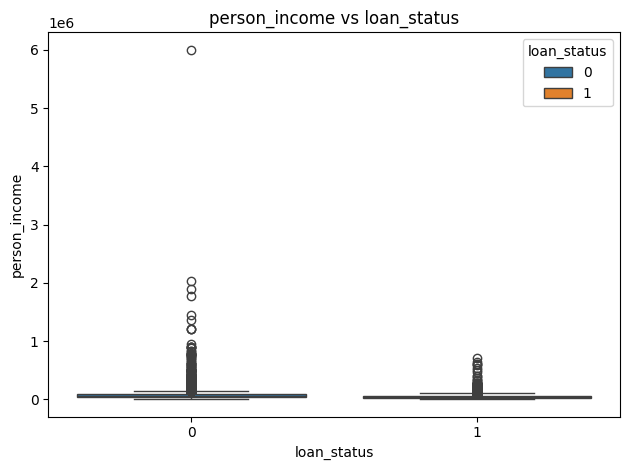

In [26]:
sns.boxplot(x='loan_status',hue='loan_status',y='person_income',data=data)
plt.title(f'person_income vs loan_status')
plt.tight_layout()
plt.show()

##### person_home_ownership

Text(0, 0.5, 'Cantidad')

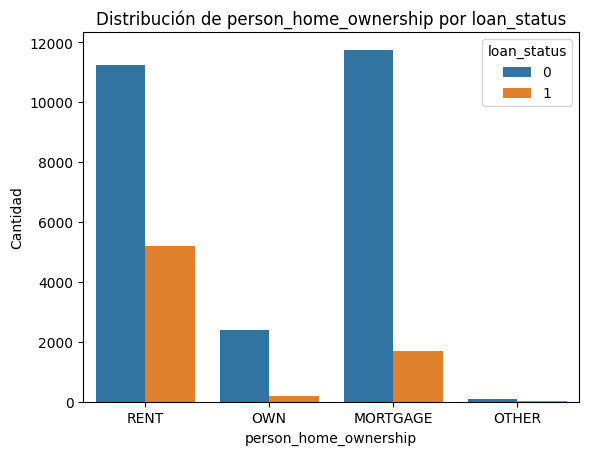

In [27]:
sns.countplot(x='person_home_ownership', hue='loan_status', data=data)
plt.title(f'Distribución de person_home_ownership por loan_status')
plt.ylabel('Cantidad')

In [28]:
data.groupby(["person_home_ownership"]).agg({'loan_status':['count','mean']})

loan_status          
                            count      mean
person_home_ownership                      
MORTGAGE                    13444  0.125707
OTHER                         107  0.308411
OWN                          2584  0.074690
RENT                        16446  0.315700

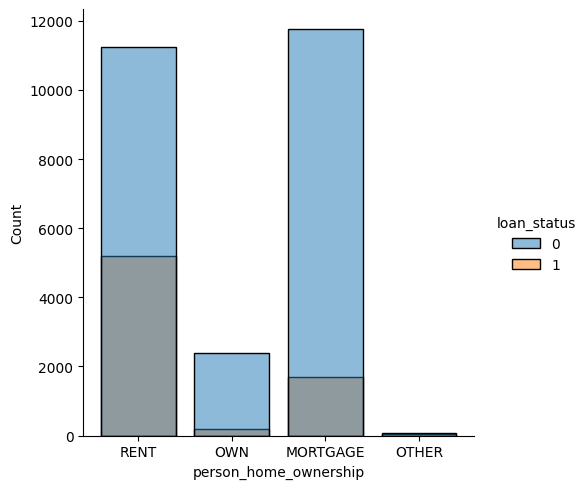

In [29]:
sns.displot(data, x="person_home_ownership", hue="loan_status", shrink=.8)

##### loan_intent

<Axes: xlabel='loan_intent', ylabel='count'>

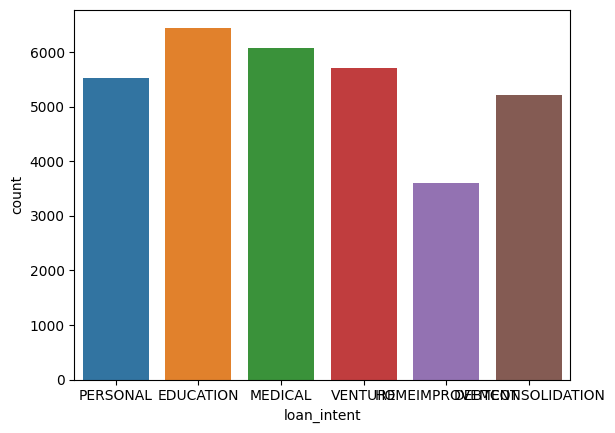

In [30]:
sns.countplot(data, x="loan_intent", hue="loan_intent")

<Axes: xlabel='loan_intent', ylabel='count'>

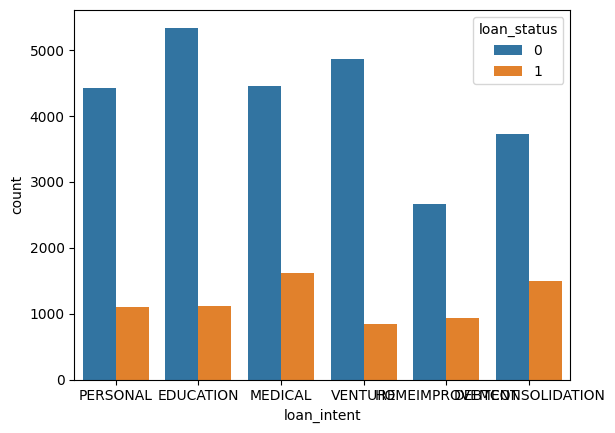

In [31]:
sns.countplot(data, x="loan_intent", hue="loan_status")

In [32]:
data.groupby(["loan_intent"]).agg({'loan_status':['count','mean']})

loan_status          
                        count      mean
loan_intent                            
DEBTCONSOLIDATION        5212  0.285879
EDUCATION                6453  0.172168
HOMEIMPROVEMENT          3605  0.261026
MEDICAL                  6071  0.267007
PERSONAL                 5521  0.198877
VENTURE                  5719  0.148103

##### person_emp_length

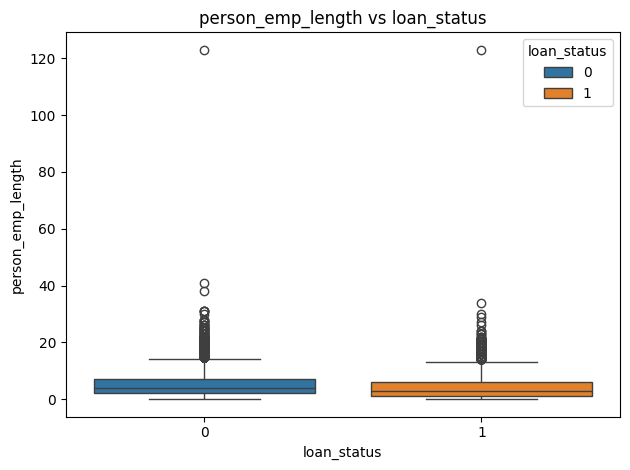

In [33]:
sns.boxplot(x='loan_status',hue='loan_status',y='person_emp_length',data=data)
plt.title(f'person_emp_length vs loan_status')
plt.tight_layout()
plt.show()

In [34]:
num_bins  = sturges_formula(data['person_emp_length'])
data['person_emp_length_bin'] = pd.cut(data['person_emp_length'],num_bins)
data.groupby(["person_emp_length_bin"]).agg({'person_emp_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\1928736983.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["person_emp_length_bin"]).agg({'person_emp_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})


person_emp_length                                   \
                                    min    max median        mean  count   
person_emp_length_bin                                                      
(-0.123, 7.688]                     0.0    7.0    3.0    3.142120  25007   
(7.688, 15.375]                     8.0   15.0    9.0   10.157817   6064   
(15.375, 23.062]                   16.0   23.0   17.0   17.875657    571   
(23.062, 30.75]                    24.0   30.0   25.0   25.828571     35   
(30.75, 38.438]                    31.0   38.0   31.0   32.666667      6   
(38.438, 46.125]                   41.0   41.0   41.0   41.000000      1   
(46.125, 53.812]                    NaN    NaN    NaN         NaN      0   
(53.812, 61.5]                      NaN    NaN    NaN         NaN      0   
(61.5, 69.188]                      NaN    NaN    NaN         NaN      0   
(69.188, 76.875]                    NaN    NaN    NaN         NaN      0   
(76.875, 84.562]                    NaN    NaN    NaN         NaN      0   
(84.562, 92.25]                     NaN    NaN    NaN         NaN      0   
(92.25, 99.938]                     NaN    NaN    NaN         NaN      0   
(99.938, 107.625]                   NaN    NaN    NaN         NaN      0   
(107.625, 115.312]                  NaN    NaN    NaN         NaN      0   
(115.312, 123.0]                  123.0  123.0  123.0  123.000000      2   

                      loan_status  
                             mean  
person_emp_length_bin              
(-0.123, 7.688]          0.228176  
(7.688, 15.375]          0.168206  
(15.375, 23.062]         0.159370  
(23.062, 30.75]          0.200000  
(30.75, 38.438]          0.166667  
(38.438, 46.125]         0.000000  
(46.125, 53.812]              NaN  
(53.812, 61.5]                NaN  
(61.5, 69.188]                NaN  
(69.188, 76.875]              NaN  
(76.875, 84.562]              NaN  
(84.562, 92.25]               NaN  
(92.25, 99.938]               NaN  
(99.938, 107.625]             NaN  
(107.625, 115.312]            NaN  
(115.312, 123.0]         0.500000

##### loan_grade

Text(0, 0.5, 'Cantidad')

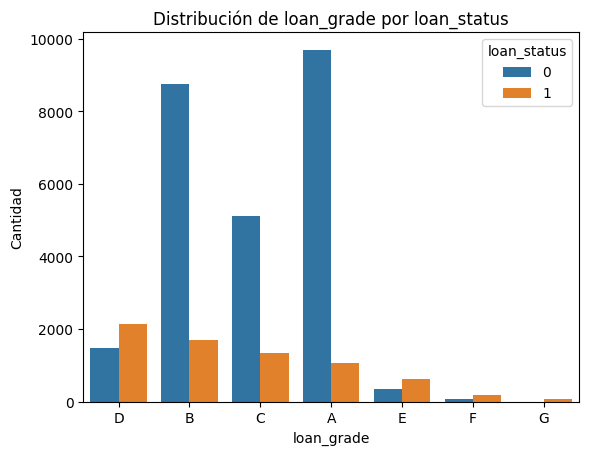

In [35]:
sns.countplot(x='loan_grade', hue='loan_status', data=data)
plt.title(f'Distribución de loan_grade por loan_status')
plt.ylabel('Cantidad')

In [36]:
data.groupby(["loan_grade"]).agg({'loan_status':['count','mean']})

loan_status          
                 count      mean
loan_grade                      
A                10777  0.099564
B                10451  0.162760
C                 6458  0.207340
D                 3626  0.590458
E                  964  0.644191
F                  241  0.705394
G                   64  0.984375

##### loan_amnt

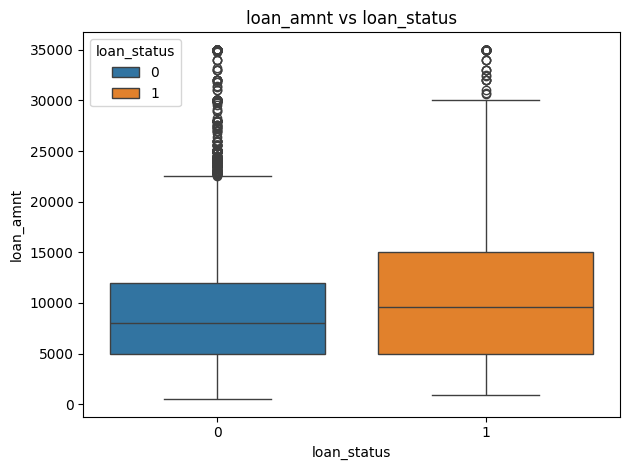

In [37]:
sns.boxplot(x='loan_status',hue='loan_status',y='loan_amnt',data=data)
plt.title(f'loan_amnt vs loan_status')
plt.tight_layout()
plt.show()

In [38]:
num_bins  = sturges_formula(data['loan_amnt'])
data['loan_amnt_bin'] = pd.cut(data['loan_amnt'],num_bins)
data.groupby(["loan_amnt_bin"]).agg({'loan_amnt': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\943019153.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_amnt_bin"]).agg({'loan_amnt': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_amnt                                     loan_status
                          min    max   median          mean count        mean
loan_amnt_bin                                                                
(465.5, 2656.25]          500   2650   2000.0   1859.806074  2733    0.206733
(2656.25, 4812.5]        2675   4800   3800.0   3732.519363  4648    0.207831
(4812.5, 6968.75]        4850   6950   5650.0   5630.702135  5761    0.171151
(6968.75, 9125.0]        6975   9125   8000.0   7872.407297  5043    0.182233
(9125.0, 11281.25]       9150  11275  10000.0  10095.046274  4214    0.200759
(11281.25, 13437.5]     11300  13425  12000.0  12188.349515  2781    0.213952
(13437.5, 15593.75]     13450  15575  15000.0  14667.830595  2556    0.260563
(15593.75, 17750.0]     15600  17750  16000.0  16429.378819   982    0.283096
(17750.0, 19906.25]     17800  19900  18000.0  18352.844950   703    0.317212
(19906.25, 22062.5]     19925  22000  20000.0  20341.130780  1384    0.299855
(22062.5, 24218.75]     22100  24200  24000.0  23684.298030   406    0.369458
(24218.75, 26375.0]     24250  26375  25000.0  24936.744433   943    0.377519
(26375.0, 28531.25]     26400  28250  28000.0  27804.444444    90    0.255556
(28531.25, 30687.5]     28800  30600  30000.0  29931.991525   118    0.389831
(30687.5, 32843.75]     30750  32500  32000.0  31752.500000    20    0.400000
(32843.75, 35000.0]     33000  35000  35000.0  34899.246231   199    0.331658

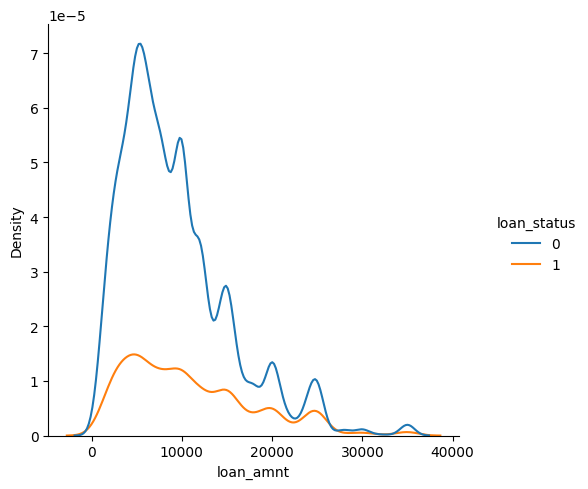

In [39]:
sns.displot(data, x="loan_amnt", kind="kde", hue="loan_status")

##### loan_int_rate

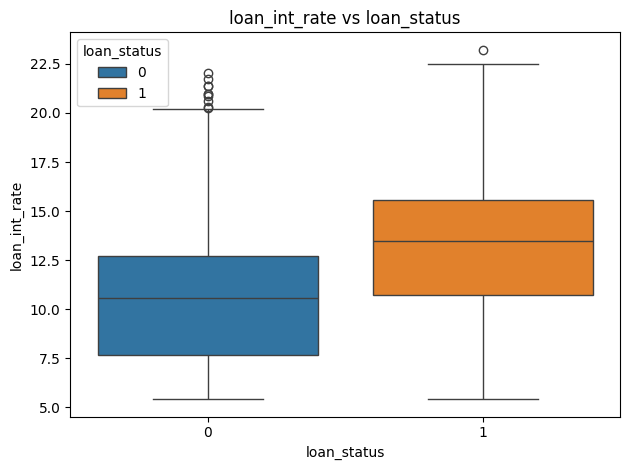

In [40]:
sns.boxplot(x='loan_status',hue='loan_status',y='loan_int_rate',data=data)
plt.title(f'loan_int_rate vs loan_status')
plt.tight_layout()
plt.show()

In [41]:
num_bins  = sturges_formula(data['loan_int_rate'])
data['loan_int_rate_bin'] = pd.cut(data['loan_int_rate'],num_bins)
data.groupby(["loan_int_rate_bin"]).agg({'loan_int_rate': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\825473760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_int_rate_bin"]).agg({'loan_int_rate': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_int_rate                                loan_status
                            min    max median       mean count        mean
loan_int_rate_bin                                                         
(5.402, 6.532]             5.42   6.39   5.99   5.828858  2084    0.061900
(6.532, 7.645]             6.54   7.51   7.14   7.141249  3932    0.100966
(7.645, 8.758]             7.66   8.70   7.90   8.026600  2685    0.115829
(8.758, 9.87]              8.88   9.83   9.25   9.239375  1776    0.136824
(9.87, 10.982]             9.88  10.96  10.37  10.342204  3694    0.166215
(10.982, 12.095]          10.99  12.09  11.49  11.458421  4173    0.166068
(12.095, 13.208]          12.12  13.17  12.69  12.676368  3158    0.207093
(13.208, 14.32]           13.22  14.30  13.62  13.734985  3091    0.248140
(14.32, 15.432]           14.35  15.38  14.84  14.880630  2158    0.460148
(15.432, 16.545]          15.45  16.49  15.99  15.995875  1542    0.580415
(16.545, 17.658]          16.59  17.58  16.95  17.075402   646    0.622291
(17.658, 18.77]           17.74  18.72  18.25  18.219536   280    0.685714
(18.77, 19.882]           18.78  19.82  19.16  19.229329   164    0.646341
(19.882, 20.995]          19.91  20.99  20.25  20.360702    57    0.824561
(20.995, 22.107]          21.14  22.06  21.36  21.449500    20    0.800000
(22.107, 23.22]           22.11  23.22  22.11  22.406000     5    1.000000

##### loan_percent_income

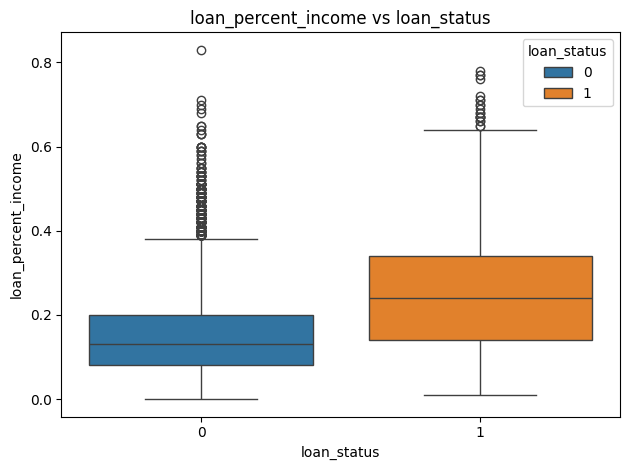

In [42]:
sns.boxplot(x='loan_status', hue='loan_status',y='loan_percent_income',data=data)
plt.title(f'loan_percent_income vs loan_status')
plt.tight_layout()
plt.show()

In [43]:
num_bins  = sturges_formula(data['loan_percent_income'])
data['loan_percent_income_bin'] = pd.cut(data['loan_percent_income'],num_bins)
data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\48052281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_percent_income                               \
                                        min   max median      mean count   
loan_percent_income_bin                                                    
(-0.00083, 0.0519]                     0.00  0.05  0.040  0.037697  3452   
(0.0519, 0.104]                        0.06  0.10  0.080  0.080673  7032   
(0.104, 0.156]                         0.11  0.15  0.130  0.129629  6706   
(0.156, 0.208]                         0.16  0.20  0.180  0.179412  5360   
(0.208, 0.259]                         0.21  0.25  0.230  0.229150  3751   
(0.259, 0.311]                         0.26  0.31  0.280  0.283534  2838   
(0.311, 0.363]                         0.32  0.36  0.340  0.338283  1538   
(0.363, 0.415]                         0.37  0.41  0.390  0.388383   903   
(0.415, 0.467]                         0.42  0.46  0.430  0.435984   493   
(0.467, 0.519]                         0.47  0.51  0.490  0.488591   298   
(0.519, 0.571]                         0.52  0.57  0.530  0.537581   124   
(0.571, 0.622]                         0.58  0.62  0.590  0.594390    41   
(0.622, 0.674]                         0.63  0.67  0.640  0.642500    28   
(0.674, 0.726]                         0.68  0.72  0.700  0.697500    12   
(0.726, 0.778]                         0.76  0.77  0.770  0.766667     3   
(0.778, 0.83]                          0.78  0.83  0.805  0.805000     2   

                        loan_status  
                               mean  
loan_percent_income_bin              
(-0.00083, 0.0519]         0.102260  
(0.0519, 0.104]            0.124573  
(0.104, 0.156]             0.128094  
(0.156, 0.208]             0.179851  
(0.208, 0.259]             0.195148  
(0.259, 0.311]             0.316068  
(0.311, 0.363]             0.682705  
(0.363, 0.415]             0.708749  
(0.415, 0.467]             0.711968  
(0.467, 0.519]             0.731544  
(0.519, 0.571]             0.830645  
(0.571, 0.622]             0.756098  
(0.622, 0.674]             0.785714  
(0.674, 0.726]             0.666667  
(0.726, 0.778]             1.000000  
(0.778, 0.83]              0.500000

In [44]:
num_bins  = 2
data['loan_percent_income_bin'] = pd.cut(data['loan_percent_income'],num_bins)
data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


C:\Users\user\AppData\Local\Temp\ipykernel_20228\1941812847.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_percent_income                                \
                                        min   max median      mean  count   
loan_percent_income_bin                                                     
(-0.00083, 0.415]                      0.00  0.41   0.14  0.160341  31580   
(0.415, 0.83]                          0.42  0.83   0.47  0.481359   1001   

                        loan_status  
                               mean  
loan_percent_income_bin              
(-0.00083, 0.415]          0.201742  
(0.415, 0.83]              0.736264

In [45]:
num_bins  = 3
data['loan_percent_income_bin'] = pd.cut(data['loan_percent_income'],num_bins)
data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})

C:\Users\user\AppData\Local\Temp\ipykernel_20228\2407472633.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_percent_income                                \
                                        min   max median      mean  count   
loan_percent_income_bin                                                     
(-0.00083, 0.277]                      0.00  0.27   0.13  0.134069  27354   
(0.277, 0.553]                         0.28  0.55   0.34  0.353701   5117   
(0.553, 0.83]                          0.56  0.83   0.60  0.619818    110   

                        loan_status  
                               mean  
loan_percent_income_bin              
(-0.00083, 0.277]          0.148753  
(0.277, 0.553]             0.577096  
(0.553, 0.83]              0.781818

In [46]:
num_bins  = 4
data['loan_percent_income_bin'] = pd.cut(data['loan_percent_income'],num_bins)
data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})

C:\Users\user\AppData\Local\Temp\ipykernel_20228\1695804768.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["loan_percent_income_bin"]).agg({'loan_percent_income': ['min', 'max','median','mean','count'],'loan_status':['mean']})


loan_percent_income                                \
                                        min   max median      mean  count   
loan_percent_income_bin                                                     
(-0.00083, 0.208]                      0.00  0.20   0.11  0.112122  22550   
(0.208, 0.415]                         0.21  0.41   0.27  0.280753   9030   
(0.415, 0.622]                         0.42  0.62   0.46  0.472354    956   
(0.622, 0.83]                          0.63  0.83   0.66  0.672667     45   

                        loan_status  
                               mean  
loan_percent_income_bin              
(-0.00083, 0.208]          0.135344  
(0.208, 0.415]             0.367553  
(0.415, 0.622]             0.735356  
(0.622, 0.83]              0.755556

###### cb_person_default_on_file

Text(0, 0.5, 'Cantidad')

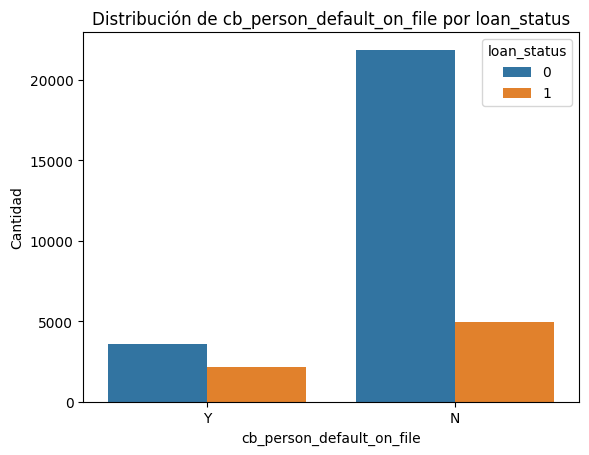

In [47]:
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=data)
plt.title(f'Distribución de cb_person_default_on_file por loan_status')
plt.ylabel('Cantidad')

In [48]:
data.groupby(["cb_person_default_on_file"]).agg({'loan_status':['count','mean']})

loan_status          
                                count      mean
cb_person_default_on_file                      
N                               26836  0.183932
Y                                5745  0.378068

###### cb_person_cred_hist_length

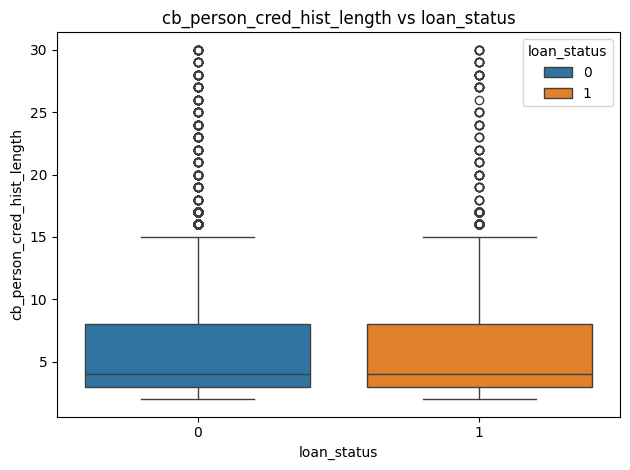

In [49]:
sns.boxplot(x='loan_status', hue='loan_status',y='cb_person_cred_hist_length',data=data)
plt.title(f'cb_person_cred_hist_length vs loan_status')
plt.tight_layout()
plt.show()

In [50]:
num_bins  = sturges_formula(data['cb_person_cred_hist_length'])
data['cb_person_cred_hist_length_bin'] = pd.cut(data['cb_person_cred_hist_length'],num_bins)
data.groupby(["cb_person_cred_hist_length_bin"]).agg({'cb_person_cred_hist_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})

C:\Users\user\AppData\Local\Temp\ipykernel_20228\1725851579.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["cb_person_cred_hist_length_bin"]).agg({'cb_person_cred_hist_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})


cb_person_cred_hist_length             \
                                                      min max median   
cb_person_cred_hist_length_bin                                         
(1.972, 3.75]                                           2   3    2.0   
(3.75, 5.5]                                             4   5    4.0   
(5.5, 7.25]                                             6   7    7.0   
(7.25, 9.0]                                             8   9    8.0   
(9.0, 10.75]                                           10  10   10.0   
(10.75, 12.5]                                          11  12   12.0   
(12.5, 14.25]                                          13  14   14.0   
(14.25, 16.0]                                          15  16   16.0   
(16.0, 17.75]                                          17  17   17.0   
(17.75, 19.5]                                          18  19   19.0   
(19.5, 21.25]                                          20  21   20.0   
(21.25, 23.0]                                          22  23   22.5   
(23.0, 24.75]                                          24  24   24.0   
(24.75, 26.5]                                          25  26   25.0   
(26.5, 28.25]                                          27  28   28.0   
(28.25, 30.0]                                          29  30   30.0   

                                                 loan_status  
                                     mean  count        mean  
cb_person_cred_hist_length_bin                                
(1.972, 3.75]                    2.499076  11908    0.229258  
(3.75, 5.5]                      4.240968   7806    0.219062  
(5.5, 7.25]                      6.505854   3758    0.203566  
(7.25, 9.0]                      8.499078   3797    0.210956  
(9.0, 10.75]                    10.000000   1850    0.202703  
(10.75, 12.5]                   11.511603    948    0.202532  
(12.5, 14.25]                   13.526203    935    0.205348  
(14.25, 16.0]                   15.507883    888    0.216216  
(16.0, 17.75]                   17.000000    407    0.191646  
(17.75, 19.5]                   18.525000     40    0.225000  
(19.5, 21.25]                   20.392157     51    0.294118  
(21.25, 23.0]                   22.500000     44    0.204545  
(23.0, 24.75]                   24.000000     30    0.200000  
(24.75, 26.5]                   25.470588     34    0.176471  
(26.5, 28.25]                   27.551020     49    0.346939  
(28.25, 30.0]                   29.611111     36    0.305556

#### Conclusions
##### **Age (person_age)**:
- No significant differences are observed in the age distribution between the default and non-default groups.

##### **Annual Income (person_income)**:
- Applicants with lower incomes tend to have higher default rates.

##### **Home Ownership (person_home_ownership)**:
- Applicants who rent or have other arrangements (neither own nor have a mortgage) show a higher tendency to default.

##### **Employment Length (person_emp_length)**:
- No clear differences are observed in employment length between the groups.

##### **Loan Intent (loan_intent)**:
- Some loan intent categories, such as "education," show higher default rates.

##### **Loan Grade (loan_grade)**:
- Lower grades (indicating higher risk) are associated with higher default rates.

##### **Loan Amount (loan_amnt)**:
- Larger loan amounts tend to be more associated with defaults.

##### **Interest Rate (loan_int_rate)**:
- Higher interest rates are clearly associated with higher default rates.

##### **Loan Percent Income (loan_percent_income)**:
- A higher percentage of income dedicated to the loan correlates with a higher default rate.

##### **Default History (cb_person_default_on_file)**:
- Applicants with a previous default history have a higher probability of defaulting again.

##### **Credit History Length (cb_person_cred_hist_length)**:
- Credit history length does not show a clear correlation with default rates.

In summary, factors such as lower incomes, renting, having a low loan grade, requesting larger loan amounts or higher interest rates, and having a previous default history are associated with a higher probability of loan default. These findings can be useful for financial institutions when assessing credit risk and making lending decisions.


# Data Preparations

In [51]:
gg["object"].values

array(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'], dtype=object)

##### loan_grade

In [52]:
data["loan_grade"].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [53]:
data["loan_grade"] = data["loan_grade"].replace(["A","B","C","D","E","F","G"],[1,2,3,4,5,6,7])

C:\Users\user\AppData\Local\Temp\ipykernel_20228\2351493195.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["loan_grade"] = data["loan_grade"].replace(["A","B","C","D","E","F","G"],[1,2,3,4,5,6,7])


In [54]:
data_corr = data.corr(numeric_only = True)
data_corr["loan_status"].abs().sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_grade                    0.373080
loan_int_rate                 0.335133
person_income                 0.144449
loan_amnt                     0.105376
person_emp_length             0.082489
person_age                    0.021629
cb_person_cred_hist_length    0.015529
Name: loan_status, dtype: float64

##### cb_person_default_on_file

In [55]:
data["cb_person_default_on_file"].unique()

array(['Y', 'N'], dtype=object)

In [56]:
data["cb_person_default_on_file"] = data["cb_person_default_on_file"].replace(["Y","N"],[0,1])

C:\Users\user\AppData\Local\Temp\ipykernel_20228\90193657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["cb_person_default_on_file"] = data["cb_person_default_on_file"].replace(["Y","N"],[0,1])


<Axes: >

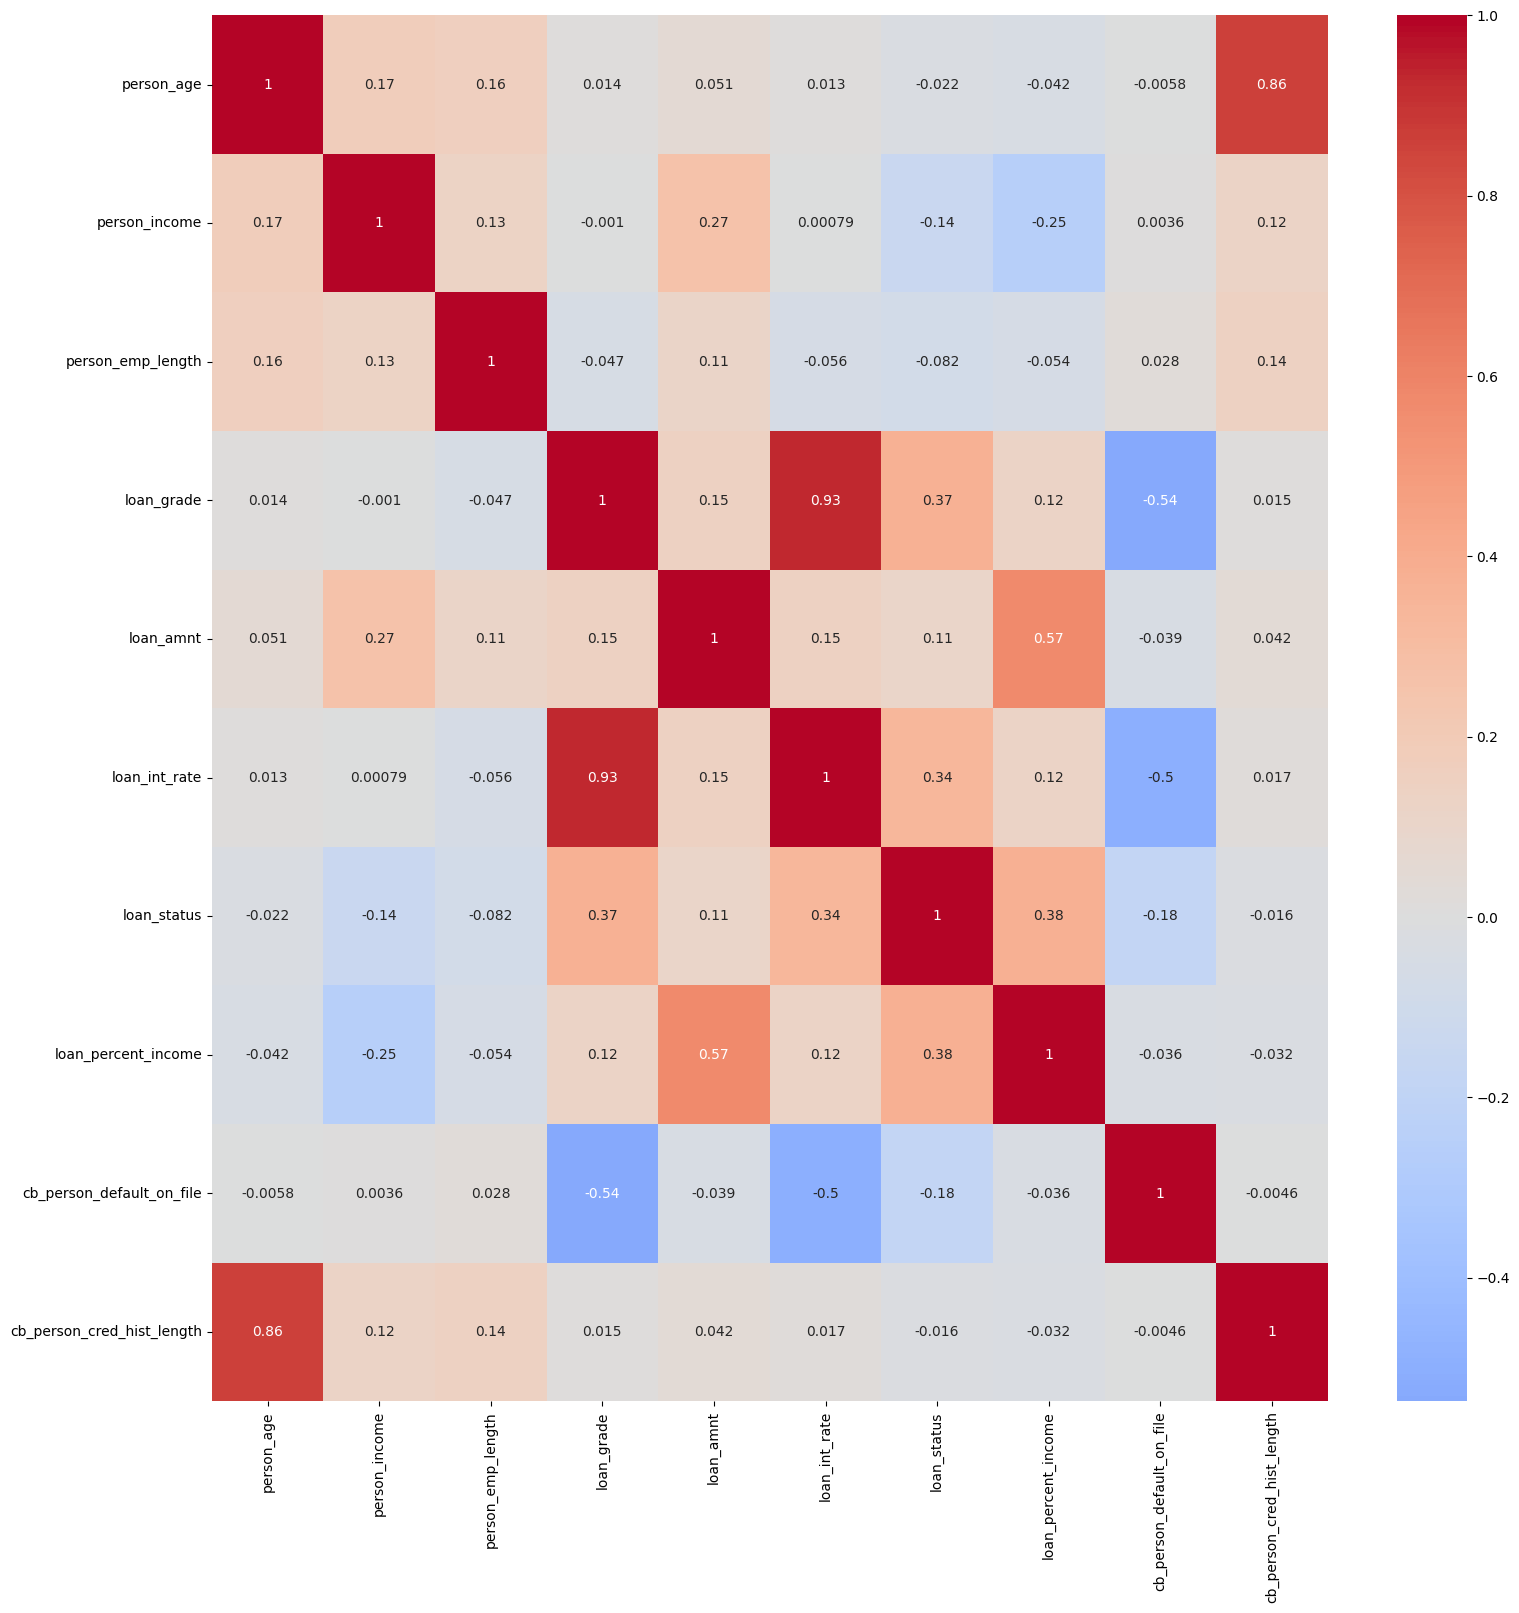

In [57]:
figure(figsize=(18,18))
correlation_matrix = data.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

##### person_home_ownership

In [58]:
data = pd.get_dummies(data, columns=["person_home_ownership"])

<Axes: >

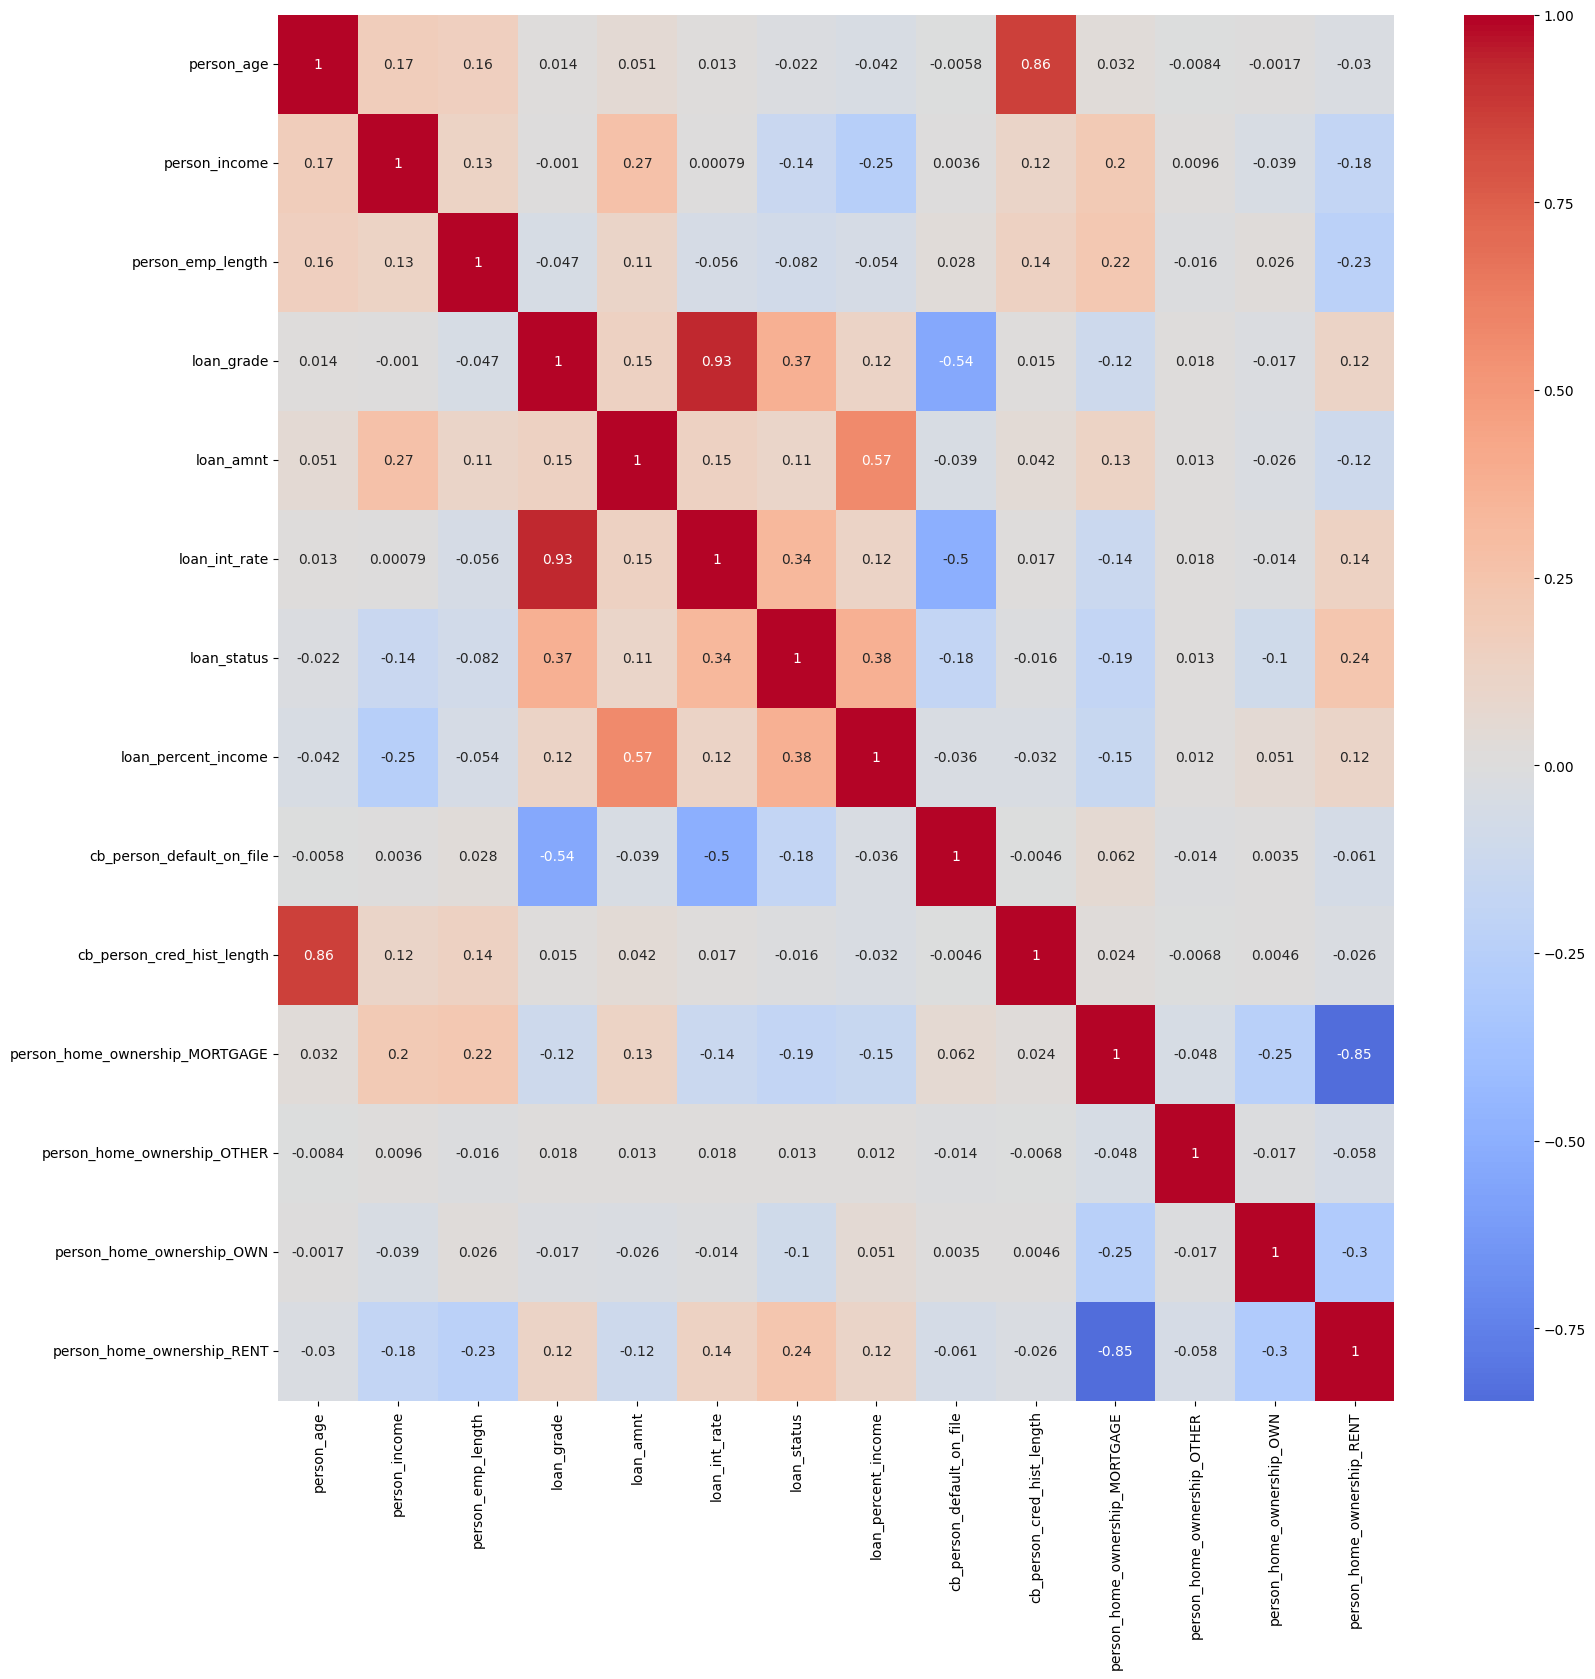

In [59]:
figure(figsize=(18,18))
correlation_matrix = data.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

## Imputation of Missing Values

In [60]:
#data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data.fillna({'person_emp_length':data['person_emp_length'].median()}, inplace=True)
#data['loan_int_rate'].fillna(data['loan_int_rate'].mean(), inplace=True)
data.fillna({'loan_int_rate':data['loan_int_rate'].mean()}, inplace=True)
data

person_age  person_income  person_emp_length      loan_intent  \
0              22          59000              123.0         PERSONAL   
1              21           9600                5.0        EDUCATION   
2              25           9600                1.0          MEDICAL   
3              23          65500                4.0          MEDICAL   
4              24          54400                8.0          MEDICAL   
...           ...            ...                ...              ...   
32576          57          53000                1.0         PERSONAL   
32577          54         120000                4.0         PERSONAL   
32578          65          76000                3.0  HOMEIMPROVEMENT   
32579          56         150000                5.0         PERSONAL   
32580          66          42000                2.0          MEDICAL   

       loan_grade  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0               4      35000          16.02            1                 0.59   
1               2       1000          11.14            0                 0.10   
2               3       5500          12.87            1                 0.57   
3               3      35000          15.23            1                 0.53   
4               3      35000          14.27            1                 0.55   
...           ...        ...            ...          ...                  ...   
32576           3       5800          13.16            0                 0.11   
32577           1      17625           7.49            0                 0.15   
32578           2      35000          10.99            1                 0.46   
32579           2      15000          11.48            0                 0.10   
32580           2       6475           9.99            0                 0.15   

       cb_person_default_on_file  ...   person_age_bin person_emp_length_bin  \
0                              0  ...  (19.876, 27.75]      (115.312, 123.0]   
1                              1  ...  (19.876, 27.75]       (-0.123, 7.688]   
2                              1  ...  (19.876, 27.75]       (-0.123, 7.688]   
3                              1  ...  (19.876, 27.75]       (-0.123, 7.688]   
4                              0  ...  (19.876, 27.75]       (7.688, 15.375]   
...                          ...  ...              ...                   ...   
32576                          1  ...    (51.0, 58.75]       (-0.123, 7.688]   
32577                          1  ...    (51.0, 58.75]       (-0.123, 7.688]   
32578                          1  ...    (58.75, 66.5]       (-0.123, 7.688]   
32579                          1  ...    (51.0, 58.75]       (-0.123, 7.688]   
32580                          1  ...    (58.75, 66.5]       (-0.123, 7.688]   

             loan_amnt_bin loan_int_rate_bin loan_percent_income_bin  \
0      (32843.75, 35000.0]  (15.432, 16.545]          (0.415, 0.622]   
1         (465.5, 2656.25]  (10.982, 12.095]       (-0.00083, 0.208]   
2        (4812.5, 6968.75]  (12.095, 13.208]          (0.415, 0.622]   
3      (32843.75, 35000.0]   (14.32, 15.432]          (0.415, 0.622]   
4      (32843.75, 35000.0]   (13.208, 14.32]          (0.415, 0.622]   
...                    ...               ...                     ...   
32576    (4812.5, 6968.75]  (12.095, 13.208]       (-0.00083, 0.208]   
32577  (15593.75, 17750.0]    (6.532, 7.645]       (-0.00083, 0.208]   
32578  (32843.75, 35000.0]  (10.982, 12.095]          (0.415, 0.622]   
32579  (13437.5, 15593.75]  (10.982, 12.095]       (-0.00083, 0.208]   
32580    (4812.5, 6968.75]    (9.87, 10.982]       (-0.00083, 0.208]   

      cb_person_cred_hist_length_bin person_home_ownership_MORTGAGE  \
0                      (1.972, 3.75]                          False   
1                      (1.972, 3.75]                          False   
2                      (1.972, 3.75]                           True   
3                      (1.972, 3.75]                       

## Outliers

In [61]:
data_corr = data.corr(numeric_only = True)
data_corr["loan_status"].abs().sort_values(ascending=False)

loan_status                       1.000000
loan_percent_income               0.379366
loan_grade                        0.373080
loan_int_rate                     0.319342
person_home_ownership_RENT        0.238430
person_home_ownership_MORTGAGE    0.187637
cb_person_default_on_file         0.179141
person_income                     0.144449
loan_amnt                         0.105376
person_home_ownership_OWN         0.101960
person_emp_length                 0.082182
person_age                        0.021629
cb_person_cred_hist_length        0.015529
person_home_ownership_OTHER       0.012543
Name: loan_status, dtype: float64

##### person_age

In [62]:
data.groupby(["person_age_bin"],observed=True).agg({'person_age': ['min', 'max','median','mean','count'],'loan_status':['mean']})

person_age                                loan_status
                       min  max median        mean  count        mean
person_age_bin                                                       
(19.876, 27.75]         20   27   24.0   23.975109  19967    0.225172
(27.75, 35.5]           28   35   30.0   30.675448   9148    0.206056
(35.5, 43.25]           36   43   38.0   38.610136   2565    0.206238
(43.25, 51.0]           44   51   46.0   46.619632    652    0.203988
(51.0, 58.75]           52   58   54.0   54.433962    159    0.257862
(58.75, 66.5]           59   66   62.0   62.406250     64    0.343750
(66.5, 74.25]           67   73   70.0   70.062500     16    0.125000
(74.25, 82.0]           76   80   78.0   78.000000      3    0.000000
(82.0, 89.75]           84   84   84.0   84.000000      1    0.000000
(89.75, 97.5]           94   94   94.0   94.000000      1    0.000000
(120.75, 128.5]        123  123  123.0  123.000000      2    0.000000
(136.25, 144.0]        144  144  144.0  144.000000      3    0.000000

###### *Delimitamos con el rango intercuarlítico*

In [63]:
Q1=data["person_age"].quantile(0.25)
Q3=data["person_age"].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
mask = data["person_age"] < Upper_Whisker
data[mask]["loan_status"].value_counts()

loan_status
0    24298
1     6789
Name: count, dtype: int64

In [64]:
100-len(data[mask])/len(data)*100

4.5854946134249985

- Observamos que la data a eliminar según el criterio del rango intercuartílico representa un %4.5. Consideramos mucha información, y procederemos a filtrar de forma distinta.

In [65]:
data = data[data["person_age"] < 123]

##### person_emp_length_bin

In [66]:
num_bins  = sturges_formula(data['person_emp_length'])
data['person_emp_length_bin'] = pd.cut(data['person_emp_length'],num_bins)
data.groupby(["person_emp_length_bin"]).agg({'person_emp_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})

C:\Users\user\AppData\Local\Temp\ipykernel_20228\1883466133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['person_emp_length_bin'] = pd.cut(data['person_emp_length'],num_bins)
C:\Users\user\AppData\Local\Temp\ipykernel_20228\1883466133.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["person_emp_length_bin"]).agg({'person_emp_length': ['min', 'max','median','mean','count'],'loan_status':['mean']})


person_emp_length                                   \
                                    min    max median        mean  count   
person_emp_length_bin                                                      
(-0.123, 7.688]                     0.0    7.0    3.0    3.171596  25898   
(7.688, 15.375]                     8.0   15.0    9.0   10.157513   6063   
(15.375, 23.062]                   16.0   23.0   17.0   17.875657    571   
(23.062, 30.75]                    24.0   30.0   25.0   25.828571     35   
(30.75, 38.438]                    31.0   38.0   31.0   32.666667      6   
(38.438, 46.125]                   41.0   41.0   41.0   41.000000      1   
(46.125, 53.812]                    NaN    NaN    NaN         NaN      0   
(53.812, 61.5]                      NaN    NaN    NaN         NaN      0   
(61.5, 69.188]                      NaN    NaN    NaN         NaN      0   
(69.188, 76.875]                    NaN    NaN    NaN         NaN      0   
(76.875, 84.562]                    NaN    NaN    NaN         NaN      0   
(84.562, 92.25]                     NaN    NaN    NaN         NaN      0   
(92.25, 99.938]                     NaN    NaN    NaN         NaN      0   
(99.938, 107.625]                   NaN    NaN    NaN         NaN      0   
(107.625, 115.312]                  NaN    NaN    NaN         NaN      0   
(115.312, 123.0]                  123.0  123.0  123.0  123.000000      2   

                      loan_status  
                             mean  
person_emp_length_bin              
(-0.123, 7.688]          0.231215  
(7.688, 15.375]          0.168234  
(15.375, 23.062]         0.159370  
(23.062, 30.75]          0.200000  
(30.75, 38.438]          0.166667  
(38.438, 46.125]         0.000000  
(46.125, 53.812]              NaN  
(53.812, 61.5]                NaN  
(61.5, 69.188]                NaN  
(69.188, 76.875]              NaN  
(76.875, 84.562]              NaN  
(84.562, 92.25]               NaN  
(92.25, 99.938]               NaN  
(99.938, 107.625]             NaN  
(107.625, 115.312]            NaN  
(115.312, 123.0]         0.500000

In [67]:
Q1=data["person_emp_length"].quantile(0.25)
Q3=data["person_emp_length"].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
mask = data["person_emp_length"] < Upper_Whisker
data[mask]["loan_status"].value_counts()

loan_status
0    24758
1     6965
Name: count, dtype: int64

In [68]:
Upper_Whisker

14.5

- Consideramos muy alto bajo el Upper Whisker. Depuraremos de manera manual.


In [69]:
100-len(data[mask])/len(data)*100

2.618492141453828

In [70]:
data = data[data["person_emp_length"] < 115.312]
data.corr(numeric_only = True)["loan_status"].abs().sort_values(ascending=False)

loan_status                       1.000000
loan_percent_income               0.379250
loan_grade                        0.373042
loan_int_rate                     0.319302
person_home_ownership_RENT        0.238416
person_home_ownership_MORTGAGE    0.187607
cb_person_default_on_file         0.179002
person_income                     0.168485
loan_amnt                         0.105240
person_home_ownership_OWN         0.101981
person_emp_length                 0.085613
person_age                        0.020687
cb_person_cred_hist_length        0.015472
person_home_ownership_OTHER       0.012542
Name: loan_status, dtype: float64

#### Feature Selection

In [71]:
data_corr = data.corr(numeric_only = True)["loan_status"].abs().sort_values(ascending=False)

In [72]:
first_five_columns = data_corr.head(6)[1:].index

In [73]:
df = data[first_five_columns]

<Axes: >

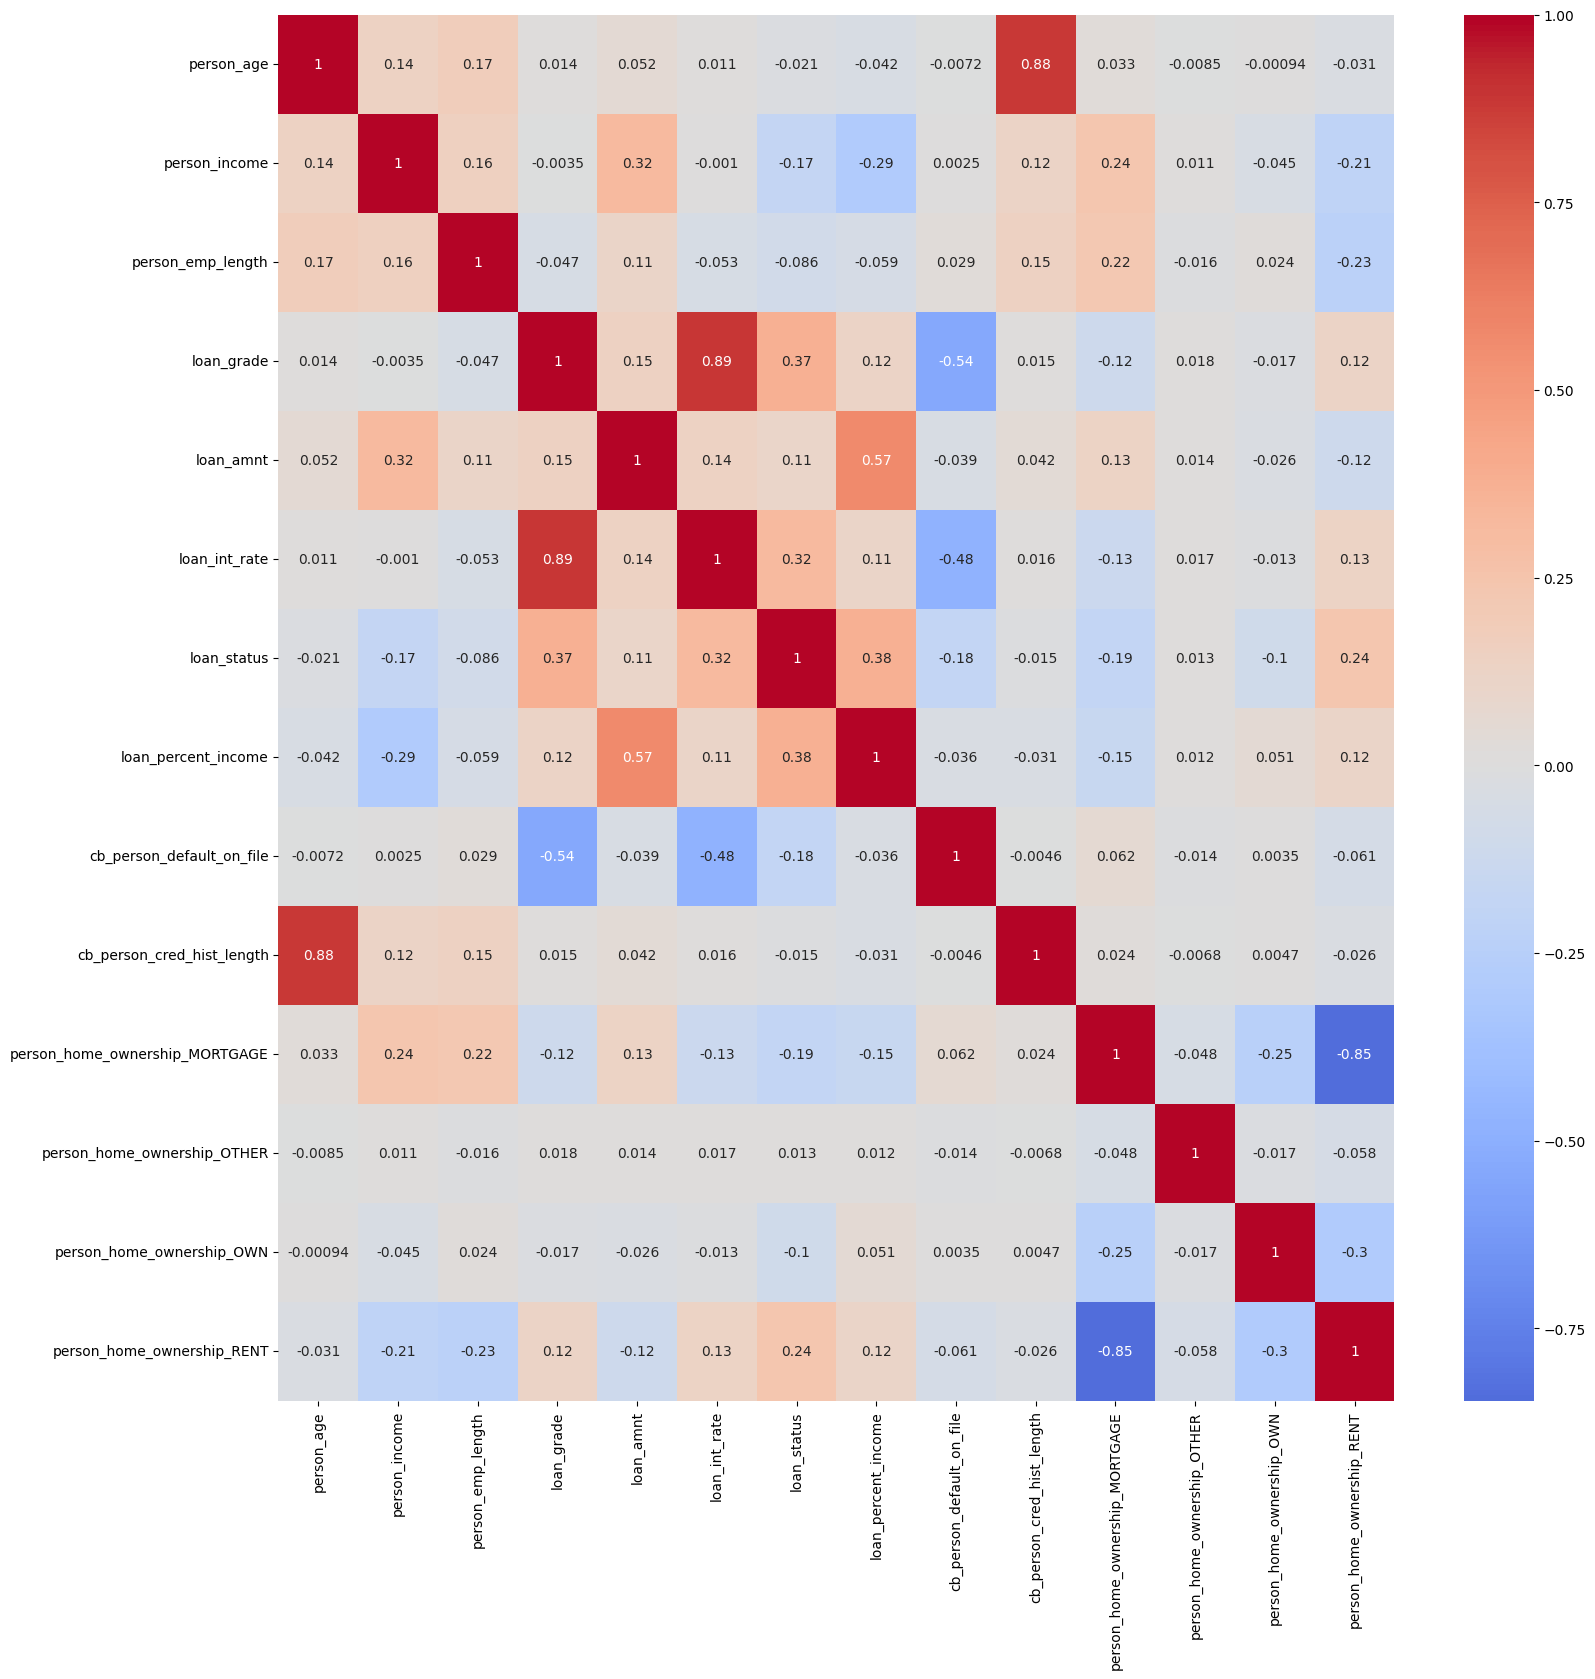

In [74]:
figure(figsize=(18,18))
correlation_matrix = data.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

In [75]:
data.corr(numeric_only = True)["loan_status"].abs().sort_values(ascending=False)

loan_status                       1.000000
loan_percent_income               0.379250
loan_grade                        0.373042
loan_int_rate                     0.319302
person_home_ownership_RENT        0.238416
person_home_ownership_MORTGAGE    0.187607
cb_person_default_on_file         0.179002
person_income                     0.168485
loan_amnt                         0.105240
person_home_ownership_OWN         0.101981
person_emp_length                 0.085613
person_age                        0.020687
cb_person_cred_hist_length        0.015472
person_home_ownership_OTHER       0.012542
Name: loan_status, dtype: float64

In [76]:
first_five_columns

Index(['loan_percent_income', 'loan_grade', 'loan_int_rate',
       'person_home_ownership_RENT', 'person_home_ownership_MORTGAGE'],
      dtype='object')

##### Estandarización


In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_stand = pd.DataFrame(sc.fit_transform(df), columns = list(df.columns))
df_stand

loan_percent_income  loan_grade  loan_int_rate  \
0                -0.657607   -0.187034       0.041685   
1                 3.745070    0.670332       0.603079   
2                 3.370374    0.670332       1.368913   
3                 3.557722    0.670332       1.057387   
4                 0.747502   -1.044399      -1.256338   
...                    ...         ...            ...   
32569            -0.563933    0.670332       0.697186   
32570            -0.189237   -1.044399      -1.142761   
32571             2.714656   -0.187034      -0.006991   
32572            -0.657607   -0.187034       0.152016   
32573            -0.189237   -0.187034      -0.331497   

       person_home_ownership_RENT  person_home_ownership_MORTGAGE  
0                       -1.009563                       -0.838155  
1                       -1.009563                        1.193097  
2                        0.990528                       -0.838155  
3                        0.990528                       -0.838155  
4                       -1.009563                       -0.838155  
...                           ...                             ...  
32569                   -1.009563                        1.193097  
32570                   -1.009563                        1.193097  
32571                    0.990528                       -0.838155  
32572                   -1.009563                        1.193097  
32573                    0.990528                       -0.838155  

[32574 rows x 5 columns]

In [78]:
from sklearn.preprocessing import MinMaxScaler
nm = MinMaxScaler()
df_minmax = pd.DataFrame(nm.fit_transform(df), columns = list(df.columns))
df_minmax

loan_percent_income  loan_grade  loan_int_rate  \
0                 0.120482    0.166667       0.321348   
1                 0.686747    0.333333       0.418539   
2                 0.638554    0.333333       0.551124   
3                 0.662651    0.333333       0.497191   
4                 0.301205    0.000000       0.096629   
...                    ...         ...            ...   
32569             0.132530    0.333333       0.434831   
32570             0.180723    0.000000       0.116292   
32571             0.554217    0.166667       0.312921   
32572             0.120482    0.166667       0.340449   
32573             0.180723    0.166667       0.256742   

       person_home_ownership_RENT  person_home_ownership_MORTGAGE  
0                             0.0                             0.0  
1                             0.0                             1.0  
2                             1.0                             0.0  
3                             1.0                             0.0  
4                             0.0                             0.0  
...                           ...                             ...  
32569                         0.0                             1.0  
32570                         0.0                             1.0  
32571                         1.0                             0.0  
32572                         0.0                             1.0  
32573                         1.0                             0.0  

[32574 rows x 5 columns]

In [79]:
from sklearn.preprocessing import Normalizer
nm_fila = Normalizer()
df_norm = pd.DataFrame(nm_fila.fit_transform(df), columns = list(df.columns))
df_norm

loan_percent_income  loan_grade  loan_int_rate  \
0                 0.008835    0.176701       0.984225   
1                 0.042970    0.226158       0.970218   
2                 0.034053    0.192754       0.978549   
3                 0.037603    0.205107       0.975624   
4                 0.034655    0.138619       0.989739   
...                    ...         ...            ...   
32569             0.008127    0.221647       0.972290   
32570             0.019675    0.131168       0.982447   
32571             0.040981    0.178180       0.979099   
32572             0.008550    0.170996       0.981518   
32573             0.014651    0.195345       0.975749   

       person_home_ownership_RENT  person_home_ownership_MORTGAGE  
0                        0.000000                        0.000000  
1                        0.000000                        0.075386  
2                        0.064251                        0.000000  
3                        0.068369                        0.000000  
4                        0.000000                        0.000000  
...                           ...                             ...  
32569                    0.000000                        0.073882  
32570                    0.000000                        0.131168  
32571                    0.089090                        0.000000  
32572                    0.000000                        0.085498  
32573                    0.097673                        0.000000  

[32574 rows x 5 columns]

# Modeling

In [80]:
def _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


#### Train Test Split

In [81]:
X = df_stand
#X = df_minmax
#X = df_norm
y = data["loan_status"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## DISCRIMINANT ANALYSIS

In [83]:
def _model_quadratic_discriminant(X_train, X_test, y_train, y_test ):
    print("="*100)
    print(f'MODEL DISCRIMINANT ANALYSIS')
    print("="*100)
    
    classifier = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    print("-"*100)
    print(f'CLASSIFICATION REPORT')
    print("-"*100)
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_ad = recall_score(y_test, y_pred)
    gini_ad = 2*roc_auc - 1
    
    _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc)
    
    values_ad = ["analysis_discriminante", recall_score_ad, roc_auc, gini_ad]
    return false_positive_rate, true_positive_rate, values_ad, roc_auc

MODEL DISCRIMINANT ANALYSIS


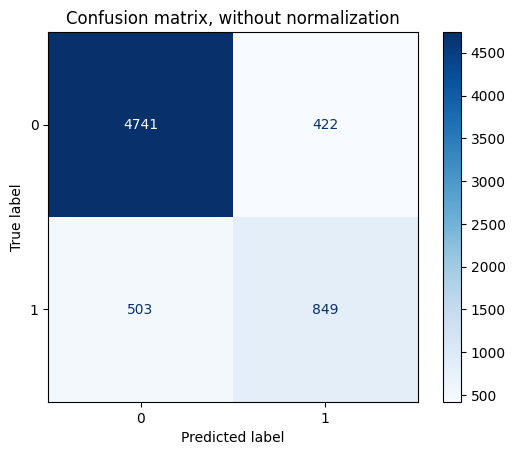

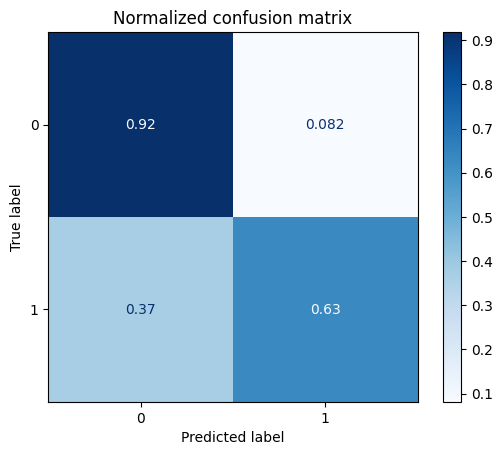

----------------------------------------------------------------------------------------------------
CLASSIFICATION REPORT
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5163
           1       0.67      0.63      0.65      1352

    accuracy                           0.86      6515
   macro avg       0.79      0.77      0.78      6515
weighted avg       0.86      0.86      0.86      6515



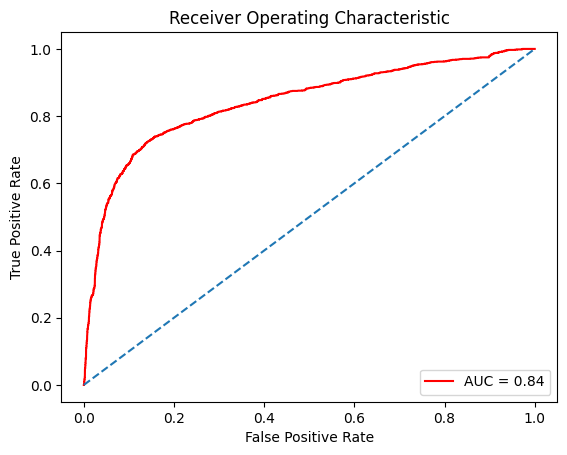

In [84]:
false_positive_rate_ad, true_positive_rate_ad, values_ad, roc_auc_ad = _model_quadratic_discriminant(X_train, X_test, y_train, y_test )

## LOGISTIC REGRESSION


In [85]:
def _model_logistic_regression(X_train, X_test, y_train, y_test ):
    print("="*100)    
    print(f'Logistic Regression')
    print("="*100)

    classifier = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                     #display_labels=y_test,
                                                     cmap=plt.cm.Blues,
                                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()

    print(f'CLASSIFICATION REPORT:')
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_rl = recall_score(y_test, y_pred)
    gini_rl = 2*roc_auc - 1

    _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc)

    values_rl = ["regresion_logistic",recall_score_rl,roc_auc,gini_rl]
    
    return false_positive_rate, true_positive_rate, values_rl, roc_auc

Logistic Regression


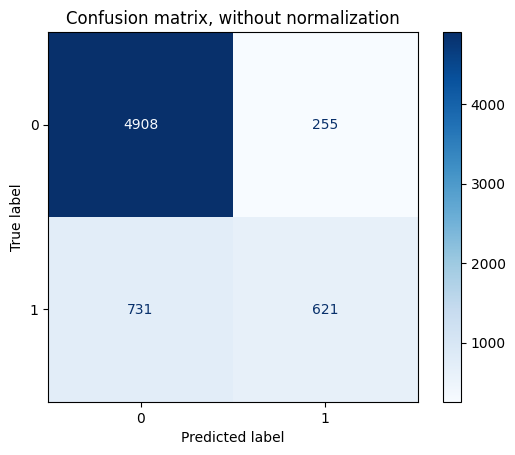

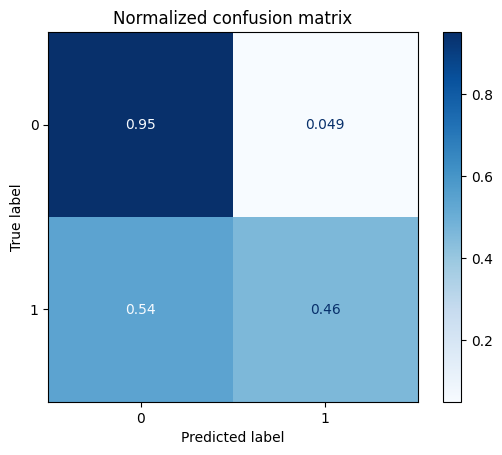

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5163
           1       0.71      0.46      0.56      1352

    accuracy                           0.85      6515
   macro avg       0.79      0.70      0.73      6515
weighted avg       0.84      0.85      0.84      6515



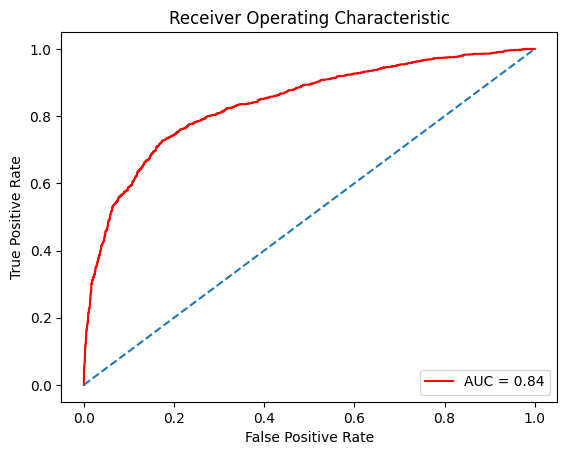

In [86]:
false_positive_rate_rl, true_positive_rate_rl, values_rl, roc_auc_rl = _model_logistic_regression(X_train, X_test, y_train, y_test )

## KNN

In [87]:
def _model_kneighbors_classifier(X_train, X_test, y_train, y_test ):
    print("="*100)    
    print(f'KNN')
    print("="*100)

    classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                     #display_labels=y_test,
                                                     cmap=plt.cm.Blues,
                                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    print(f'CLASSIFICATION REPORT:')
    print(classification_report(y_test, y_pred))
 
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_knn = recall_score(y_test, y_pred)
    gini_knn = 2*roc_auc - 1
    
    values_knn = ["knn",recall_score_knn,roc_auc,gini_knn]
    
    _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc)

    return false_positive_rate, true_positive_rate, values_knn, roc_auc

KNN


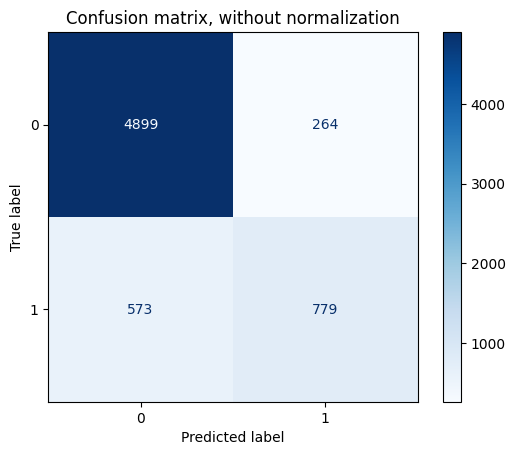

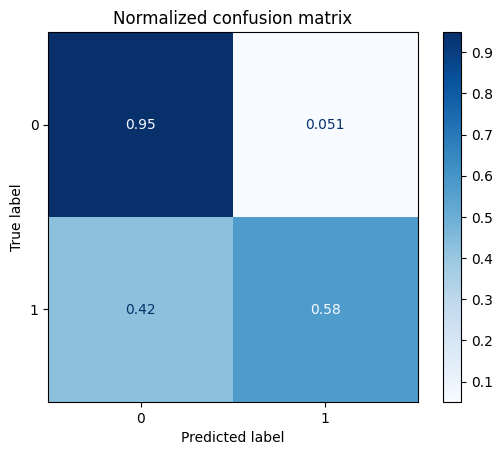

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      5163
           1       0.75      0.58      0.65      1352

    accuracy                           0.87      6515
   macro avg       0.82      0.76      0.79      6515
weighted avg       0.86      0.87      0.87      6515



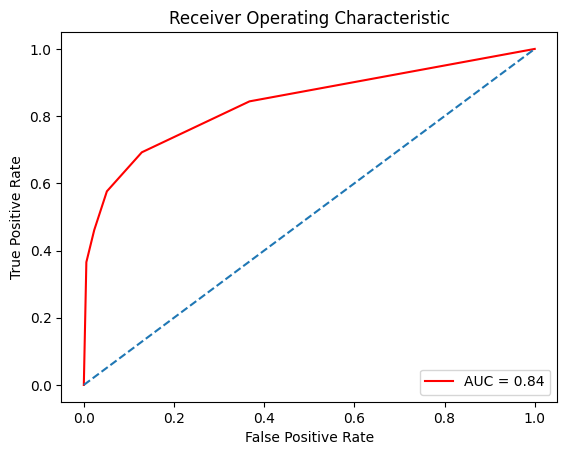

In [88]:
false_positive_rate_knn, true_positive_rate_knn, values_knn, roc_auc_knn =  _model_kneighbors_classifier(X_train, X_test, y_train, y_test )

## Naive Bayes 

In [89]:
def _model_naive_bayes(X_train, X_test, y_train, y_test ):
    print("="*100)    
    print(f'NAIVE BAYES')
    print("="*100)

    classifier = GaussianNB().fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    print(f'CLASSIFICATION REPORT:')
    print(classification_report(y_test, y_pred))
    
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_nb = recall_score(y_test, y_pred)
    gini_nb = 2*roc_auc - 1
    
    values_nb = ["naive_bayes",recall_score_nb,roc_auc,gini_nb]
    
    _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc)

    return false_positive_rate, true_positive_rate, values_nb, roc_auc

NAIVE BAYES


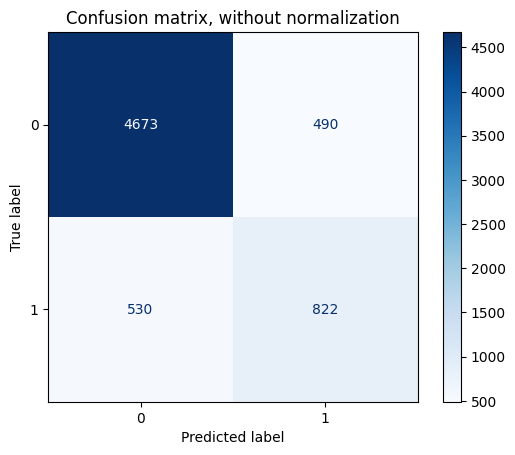

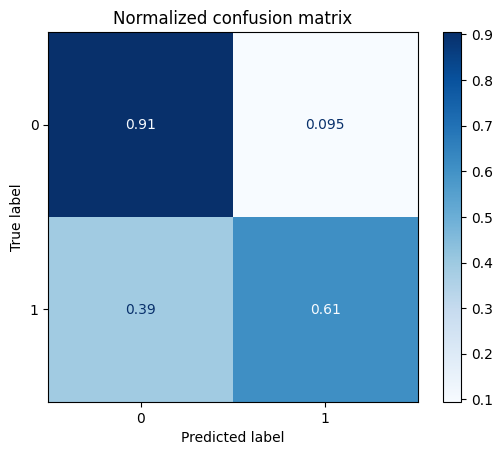

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      5163
           1       0.63      0.61      0.62      1352

    accuracy                           0.84      6515
   macro avg       0.76      0.76      0.76      6515
weighted avg       0.84      0.84      0.84      6515



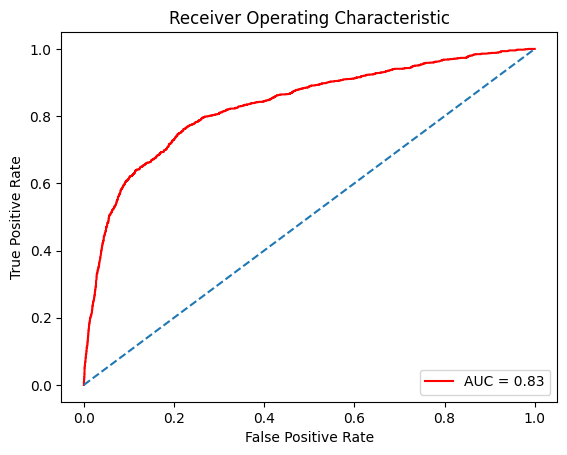

In [90]:
false_positive_rate_nb, true_positive_rate_nb, values_nb, roc_auc_nb = _model_naive_bayes(X_train, X_test, y_train, y_test )

## RNN

In [102]:
def _model_rnn(X_train, X_test, y_train, y_test ):
    print("="*100)    
    print(f'RNN')
    print("="*100)
    
    #Tuning
    #param_grid = {
    #    'hidden_layer_sizes': [(10,30,10),(20,)],
    #    'activation': ['tanh', 'relu'],
    #    'solver': ['sgd', 'adam'],
    #    'alpha': [0.0001, 0.05],
    #    'learning_rate': ['constant','adaptive'],
    #}
    #grid = GridSearchCV(MLPClassifier(max_iter=500,random_state=0),param_grid,refit=True,verbose=2,cv=5)
    #grid.fit(X_train,y_train)
    #print(grid.best_estimator_)

    classifier = MLPClassifier(activation='tanh', 
                               random_state=1, 
                               alpha=0.05, 
                               hidden_layer_sizes=(10, 30, 10), 
                               learning_rate='adaptive', 
                               max_iter=500).fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    confusion_matrix(y_test, y_pred)
    
    print(f'CLASSIFICATION REPORT:')
    print(classification_report(y_test, y_pred))
    
    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc
    
    false_positive_rate_rnn = false_positive_rate
    true_positive_rate_rnn  = true_positive_rate
    recall_score_rnn = recall_score(y_test, y_pred)
    gini_rnn = 2*roc_auc - 1
    
    values_rnn = ["rnn",recall_score_rnn,roc_auc,gini_rnn]

    _plot_roc_curve(false_positive_rate,true_positive_rate, roc_auc)

    return false_positive_rate_rnn , true_positive_rate_rnn, values_rnn, roc_auc

RNN
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5163
           1       0.79      0.60      0.68      1352

    accuracy                           0.88      6515
   macro avg       0.84      0.78      0.81      6515
weighted avg       0.88      0.88      0.88      6515



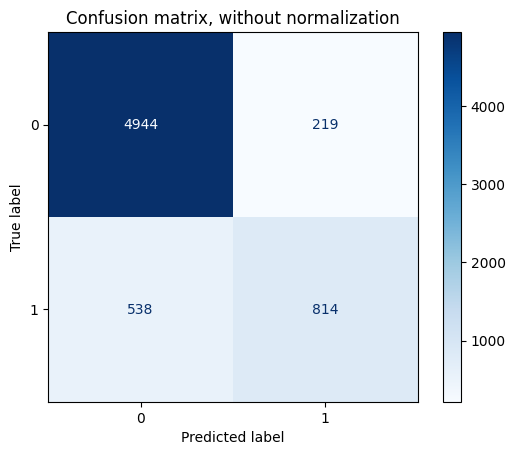

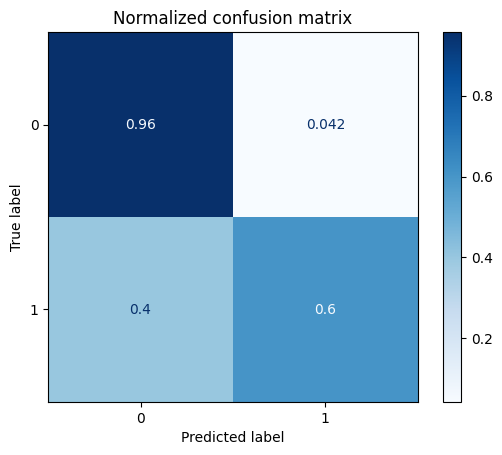

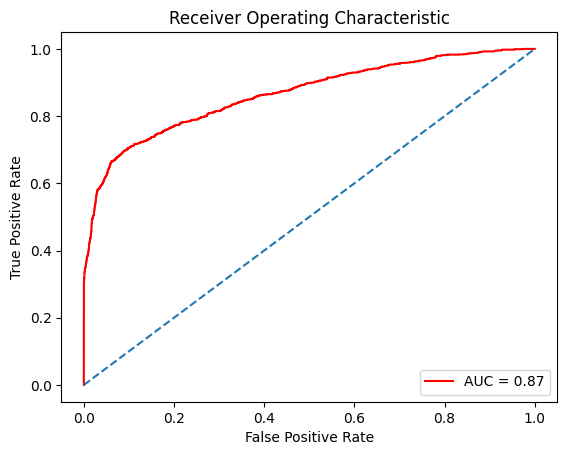

In [103]:
false_positive_rate_rnn , true_positive_rate_rnn, values_rnn, roc_auc_rnn = _model_rnn(X_train, X_test, y_train, y_test )

## SVC

In [104]:
def _model_rnn(X_train, X_test, y_train, y_test ):
    
    #Validación Cruzada
    #cv_scores = cross_val_score(SVC(kernel='rbf',probability=True),X_train,y_train,cv=5)
    #Accuracy
    #print(cv_scores)
    #Accuracy Promedio
    #print("cv_scores mean:{}".format(np.mean(cv_scores)))
    #param_grid = {'C': [0.1,1,5,10,50,100], 
    #              'gamma': [2,1.5,1,0.1,0.01,0.001],
    #              'kernel': ['rbf']}
    
    #grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
    #grid.fit(X_train,y_train)
    #print(grid.best_params_)
    
    classifier = SVC(kernel='rbf',C = 50,gamma = 0.1,probability=True, random_state=1).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    titles_options = [("Confusion matrix, without normalization", None),  ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                     #display_labels=y_test,
                                                     cmap=plt.cm.Blues,
                                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_svc = recall_score(y_test, y_pred)
    gini_svc = 2*roc_auc - 1
    
    values_svc = ["svc",recall_score_svc,roc_auc,gini_svc]

    _plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc)
    
    return false_positive_rate, true_positive_rate, roc_auc, values_svc

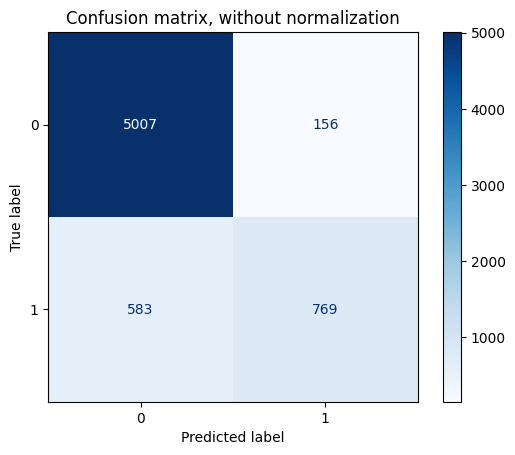

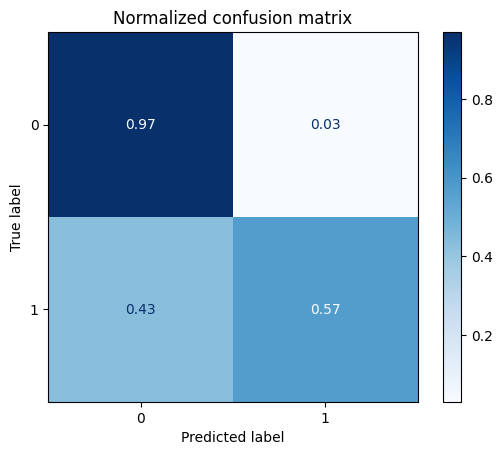

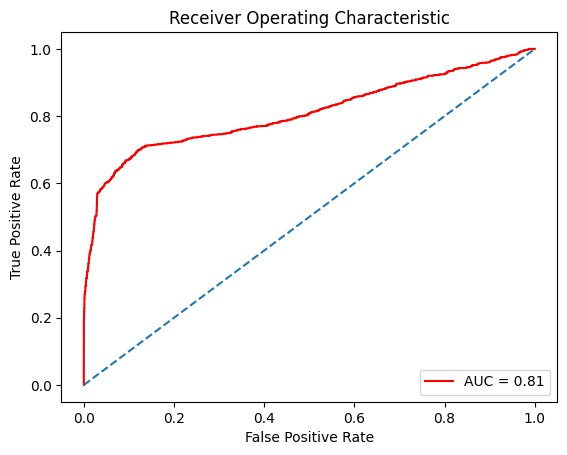

In [105]:
false_positive_rate_svc, true_positive_rate_svc, roc_auc_svc, values_svc = _model_rnn(X_train, X_test, y_train, y_test )

### Random Forest

In [106]:
def _model_random_forest(X_train, X_test, y_train, y_test):
    #cv_scores = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)
    #print(cv_scores)
    #print("cv_scores mean:{}".format(np.mean(cv_scores)))
    #Tuning
    #n_estimators: Número de árboles
    #max_features: Cantidad de variables a considerar al buscar el mejor split
    #max_depth: Profundidad del árbol
    #param_grid = {
    #    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    #    'max_features': ['sqrt', 'log2'],
    #    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
    #}
    #grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2,cv=5)
    
    #grid.fit(X_train,y_train)
    #print(grid.best_estimator_)
    #print(grid.best_params_)
    
    classifier = RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=100, random_state=1).fit(X_train, y_train)
    
    feature_scores = pd.Series(classifier.feature_importances_, index=first_five_columns).sort_values(ascending=False)

    sns.barplot(x=feature_scores, y=feature_scores.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()
    y_pred = classifier.predict(X_test)

    titles_options = [("Confusion matrix, without normalization", None), ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()
    
    y_pred_prob = classifier.predict_proba(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    recall_score_rf = recall_score(y_test, y_pred)
    gini_rf = 2*roc_auc - 1
    
    values_random_forest = ["random_forest",recall_score_rf,roc_auc,gini_rf]
    
    _plot_roc_curve(false_positive_rate, true_positive_rate, roc_auc)

    return  false_positive_rate, true_positive_rate, roc_auc, values_random_forest

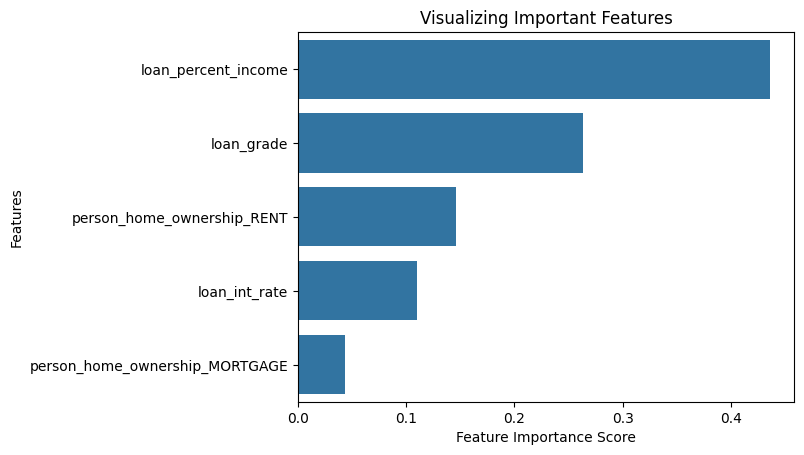

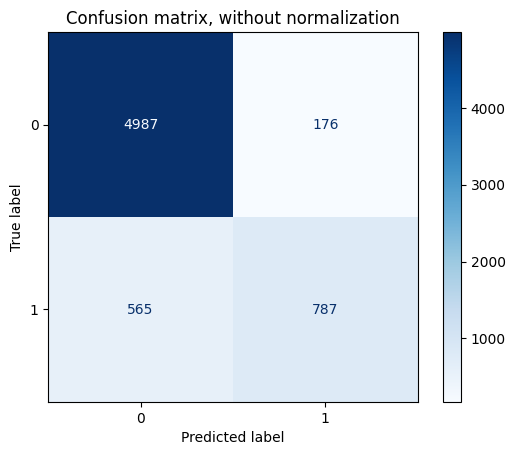

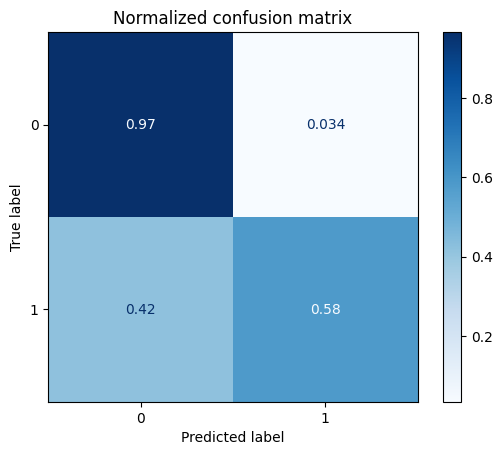

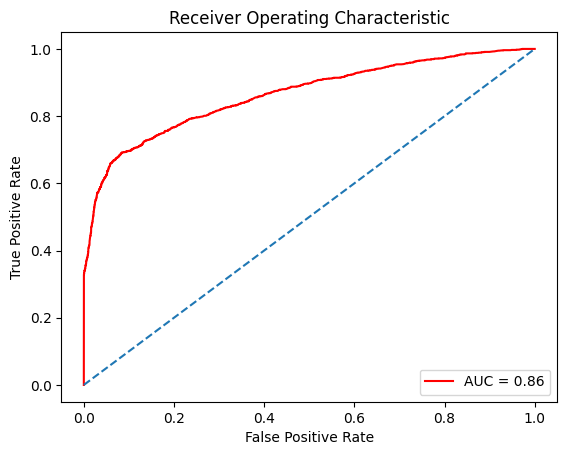

In [107]:
false_positive_rate_rf, true_positive_rate_rf, roc_auc_rf, values_random_forest = _model_random_forest(X_train, X_test, y_train, y_test)

## Conclusions

In [108]:
table_results = [values_ad] + [values_rl] + [values_nb] + [values_knn] + [values_rnn] + [values_svc] + [values_random_forest]
pd.DataFrame(table_results,columns=["model","recall","auc_roc","gini"])

model    recall   auc_roc      gini
0  analysis_discriminante  0.627959  0.841560  0.683119
1      regresion_logistic  0.459320  0.838675  0.677350
2             naive_bayes  0.607988  0.831537  0.663074
3                     knn  0.576183  0.838581  0.677163
4                     rnn  0.602071  0.865230  0.730460
5                     svc  0.568787  0.809335  0.618671
6           random_forest  0.582101  0.863927  0.727853

##### ROC Curve Comparison

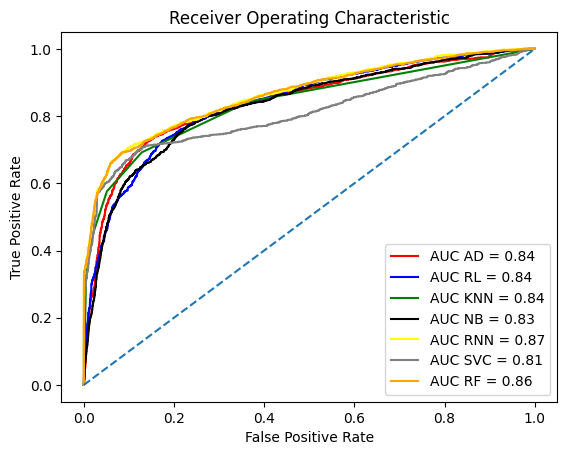

In [109]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_ad,true_positive_rate_ad, color='red',label = 'AUC AD = %0.2f' % roc_auc_ad)
plt.plot(false_positive_rate_rl,true_positive_rate_rl, color='blue',label = 'AUC RL = %0.2f' % roc_auc_rl)
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='green',label = 'AUC KNN = %0.2f' % roc_auc_knn)
plt.plot(false_positive_rate_nb,true_positive_rate_nb, color='black',label = 'AUC NB = %0.2f' % roc_auc_nb)
plt.plot(false_positive_rate_rnn,true_positive_rate_rnn, color='yellow',label = 'AUC RNN = %0.2f' % roc_auc_rnn)
plt.plot(false_positive_rate_svc,true_positive_rate_svc , color='grey',label = 'AUC SVC = %0.2f' % roc_auc_svc)
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='orange',label = 'AUC RF = %0.2f' % roc_auc_rf)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


##### Discriminant Analysis:
- Accuracy: 0.86
- Recall and F1-score for class 1: 0.63 and 0.65 respectively.
- Observations: It has good overall accuracy, but its performance for the minority class (1) is lower in terms of recall and f1-score.

##### Logistic Regression:
- Accuracy: 0.85
- Recall and F1-score for class 1: 0.46 and 0.56 respectively.
- Observations: Similar to Discriminant Analysis but with worse performance for class 1. Overall accuracy is slightly lower.

##### K-Nearest Neighbors (KNN):
- Accuracy: 0.87
- Recall and F1-score for class 1: 0.58 and 0.65 respectively.
- Observations: Better accuracy and recall than Logistic Regression, but still significantly lower precision for class 1.

##### Naive Bayes:
- Accuracy: 0.84
- Recall and F1-score for class 1: 0.61 and 0.62 respectively.
- Observations: It has somewhat lower overall accuracy and decent performance for class 1 compared to other models.

##### Recurrent Neural Network (RNN):
- Accuracy: 0.88
- Recall and F1-score for class 1: 0.60 and 0.68 respectively.
- Observations: Offers high overall accuracy and a reasonable balance between recall and f1-score for class 1.

##### Support Vector Classifier (SVC):
- Accuracy: 0.89
- Recall and F1-score for class 1: 0.57 and 0.68 respectively.
- Observations: It has high overall accuracy and acceptable performance for class 1, although with somewhat low recall.

##### Random Forest:
- Accuracy: 0.89
- Recall and F1-score for class 1: 0.58 and 0.68 respectively.
- Observations: Similar to SVC, with good overall accuracy and decent performance for class 1.


**Overall Accuracy**

Most models have similar overall accuracy, ranging from 0.84 to 0.89. The best in this aspect are SVC and Random Forest with 0.89.

**Performance in the Minority Class (1)**

This is where the most differences are observed. Models like Discriminant Analysis and Recurrent Neural Network (RNN) have a more acceptable balance between precision and recall for class 1, although none achieve very high levels in both metrics. KNN also has reasonable performance for class 1.

**Outstanding Models**:

Random Forest and SVC: Offer the best overall accuracy and decent performance for class 1, although with lower recall for class 1 compared to other models.
Recurrent Neural Network (RNN): Has a good overall balance, with high overall accuracy and a better combination of precision and recall for class 1.